# DT + KNN

Accuracy: 0.9730
Precision: 0.9757
Recall: 0.9705
F1 Score: 0.9731
AUC: 0.9932

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     18230
           1       0.98      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



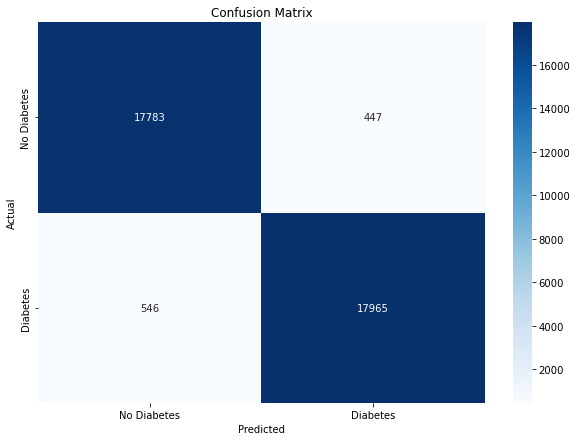

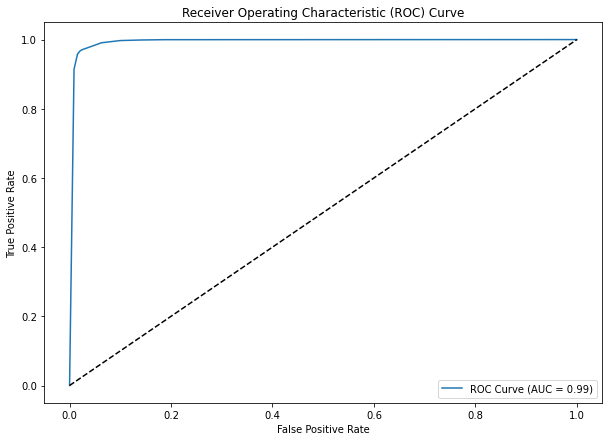

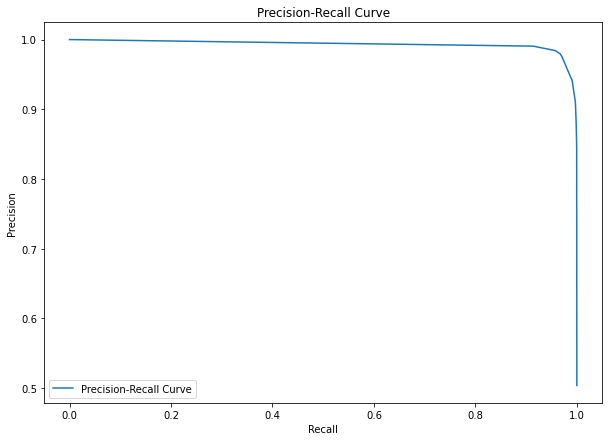

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# DT + RF

Accuracy: 0.9701
Precision: 0.9692
Recall: 0.9715
F1 Score: 0.9703
AUC: 0.9970

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



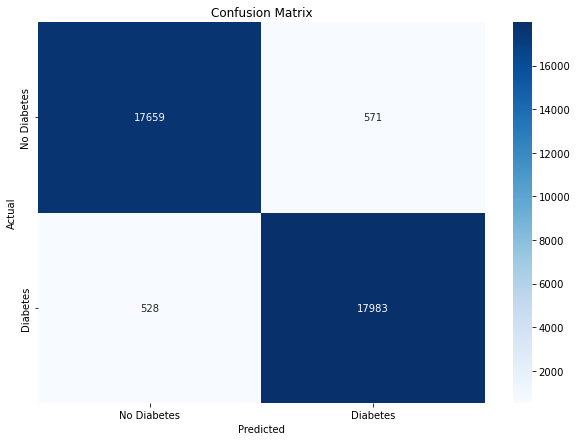

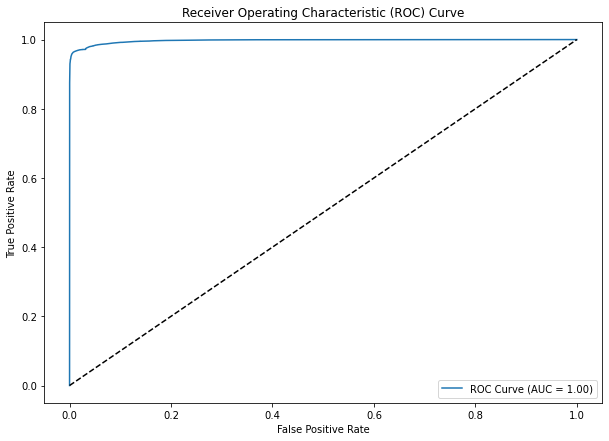

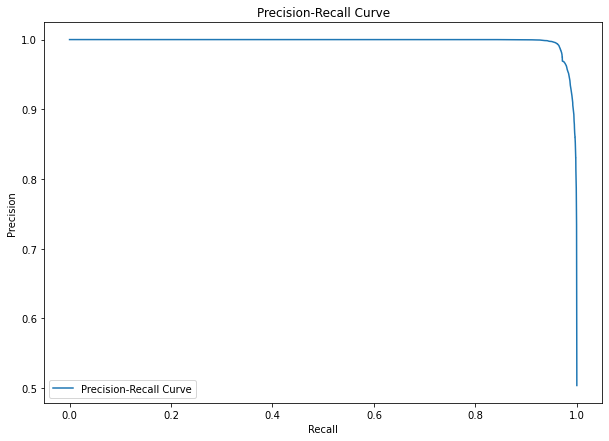

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('rf', rf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# DT + LR

Accuracy: 0.9699
Precision: 0.9687
Recall: 0.9716
F1 Score: 0.9701
AUC: 0.9929

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



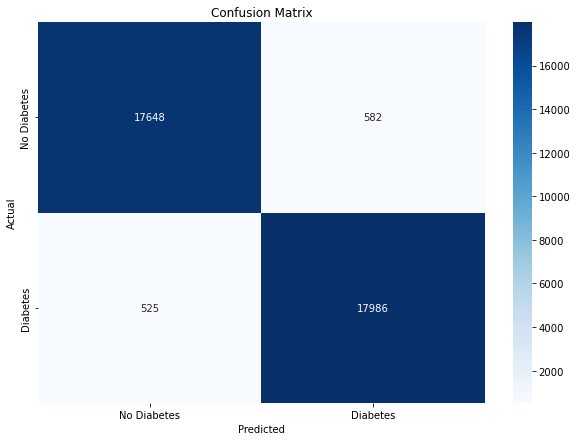

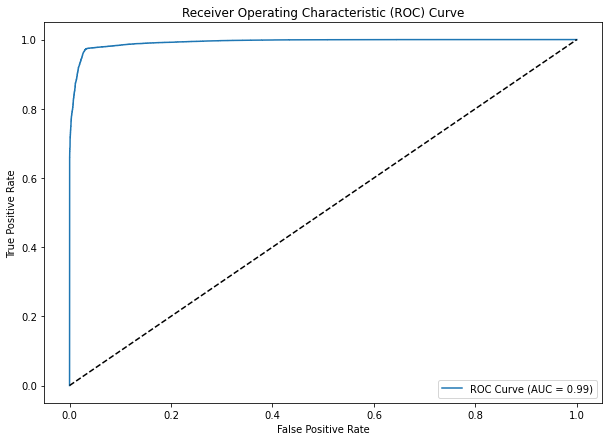

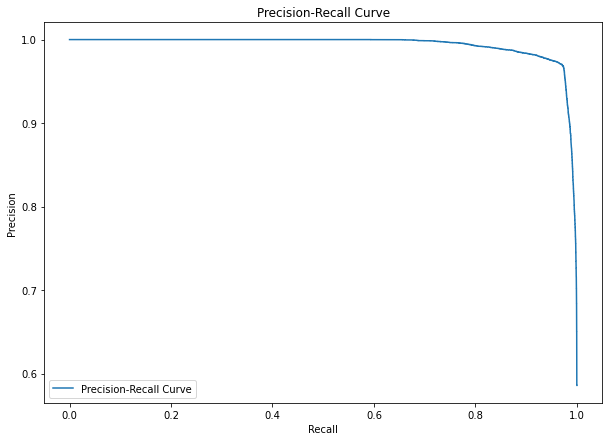

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001, max_iter=5000)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('lr', lr)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# DT + AB

Accuracy: 0.9700
Precision: 0.9690
Recall: 0.9715
F1 Score: 0.9702
AUC: 0.9970

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



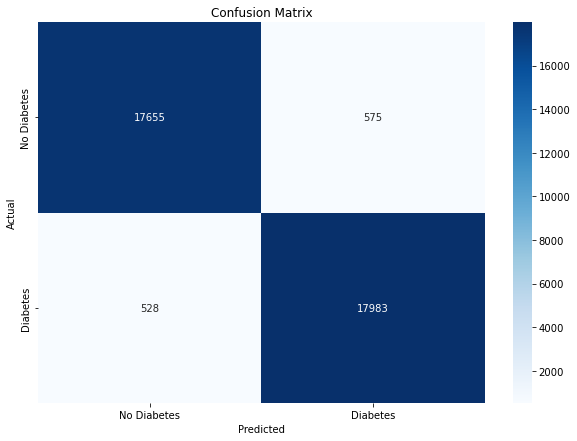

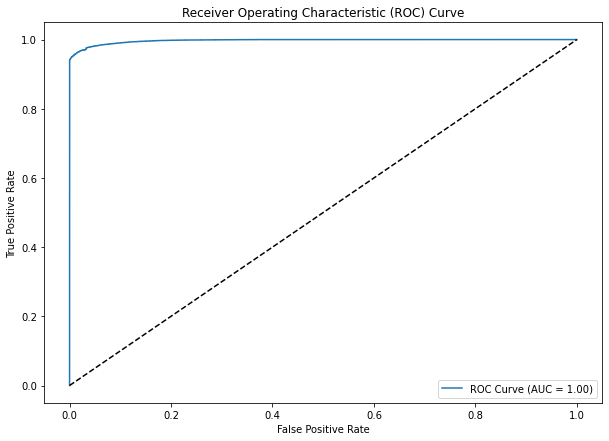

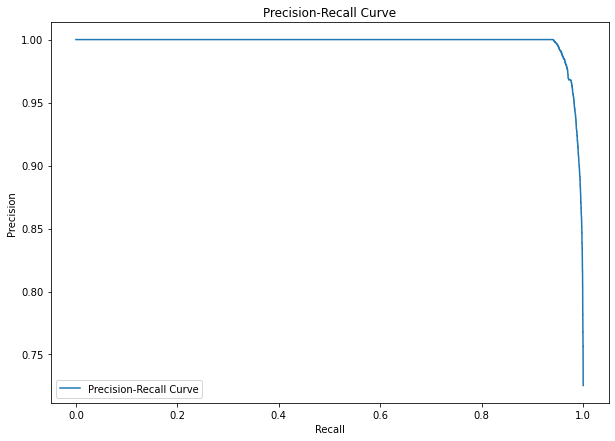

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
ada_boost = AdaBoostClassifier(n_estimators=800, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('ada', ada_boost)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# DT + XB

Accuracy: 0.9700
Precision: 0.9690
Recall: 0.9716
F1 Score: 0.9703
AUC: 0.9973

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



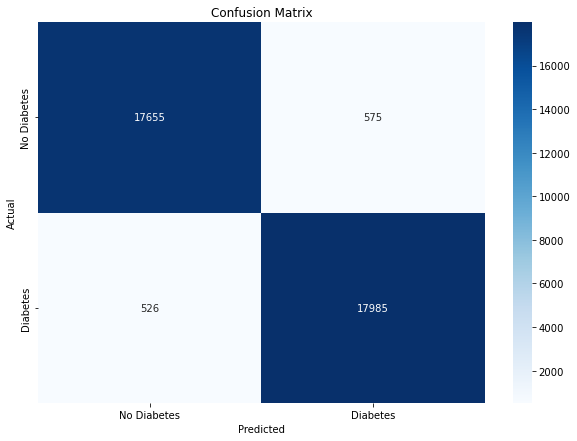

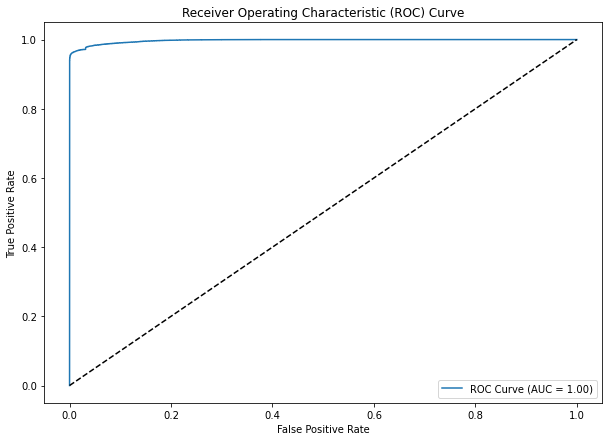

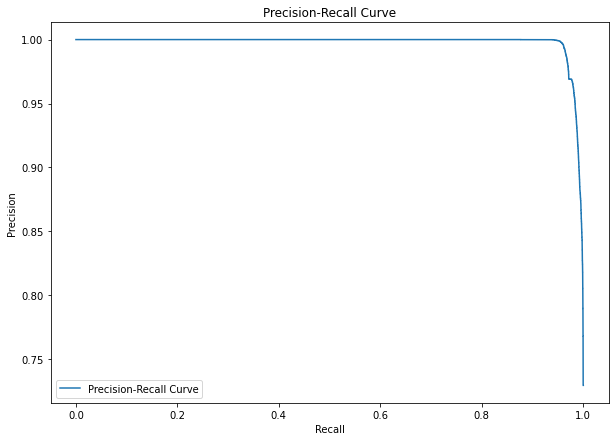

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=42, tree_method="hist", device = "cuda")

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('xgb', xgb_model)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# DT + Bagging

Accuracy: 0.9700
Precision: 0.9690
Recall: 0.9715
F1 Score: 0.9703
AUC: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



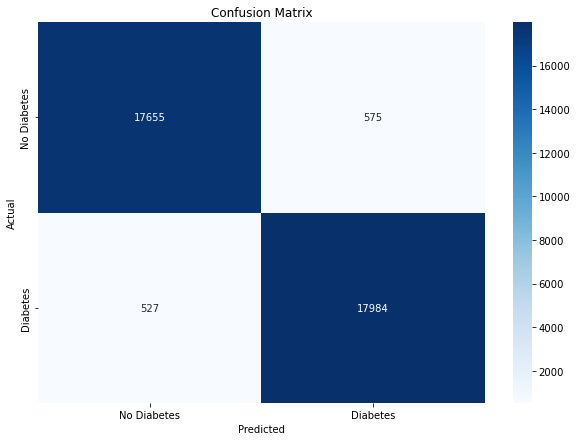

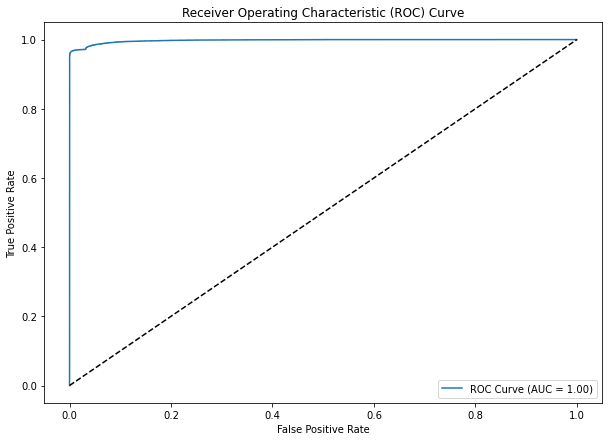

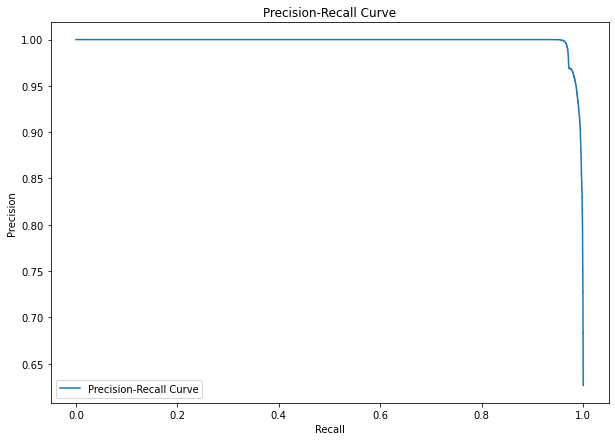

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
# bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000, random_state=42)
bagging_clf = BaggingClassifier(
    n_estimators=1500,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('dt', dt), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# KNN + RF

Accuracy: 0.9676
Precision: 0.9477
Recall: 0.9903
F1 Score: 0.9685
AUC: 0.9980

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     18230
           1       0.95      0.99      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



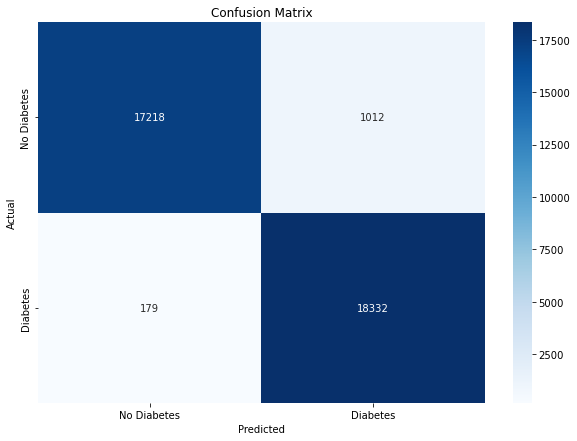

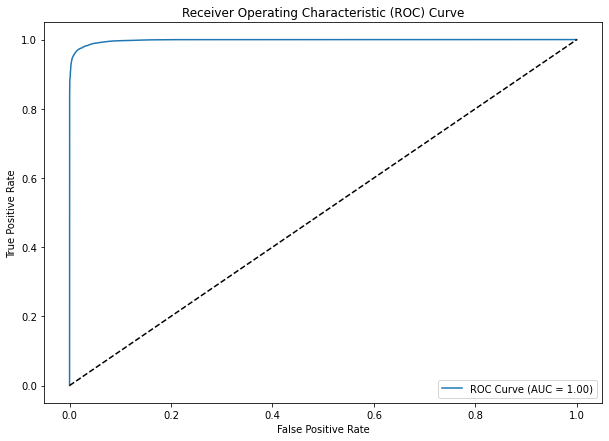

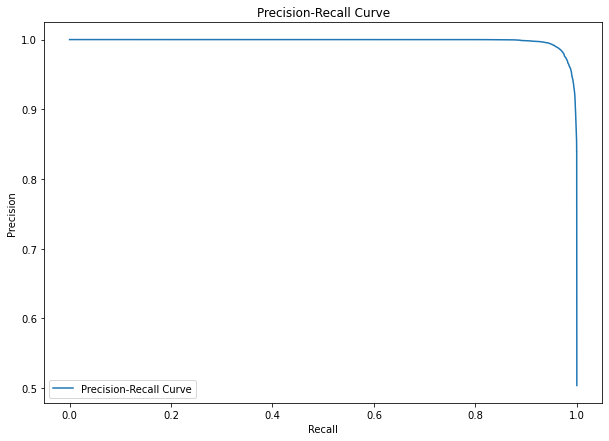

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# KNN + LR

Accuracy: 0.9510
Precision: 0.9248
Recall: 0.9826
F1 Score: 0.9528
AUC: 0.9916

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     18230
           1       0.92      0.98      0.95     18511

    accuracy                           0.95     36741
   macro avg       0.95      0.95      0.95     36741
weighted avg       0.95      0.95      0.95     36741



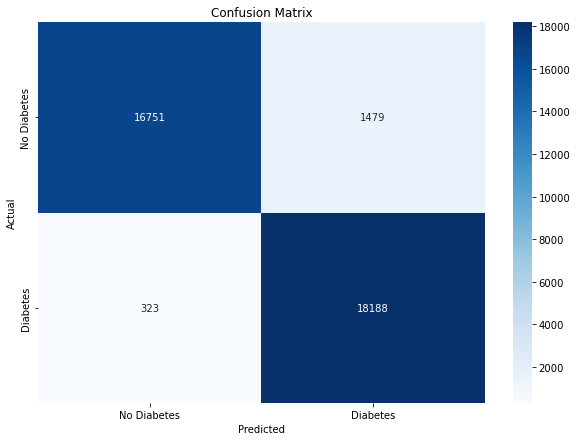

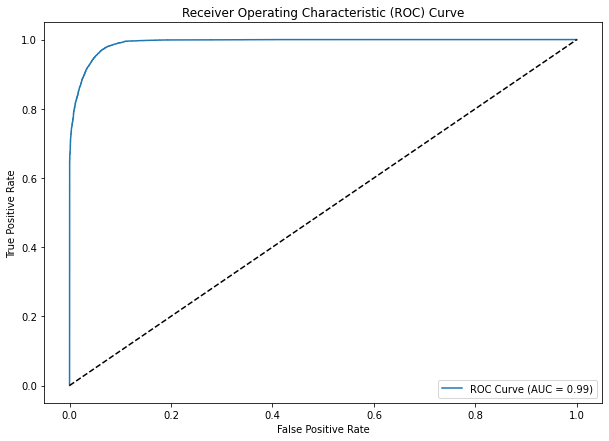

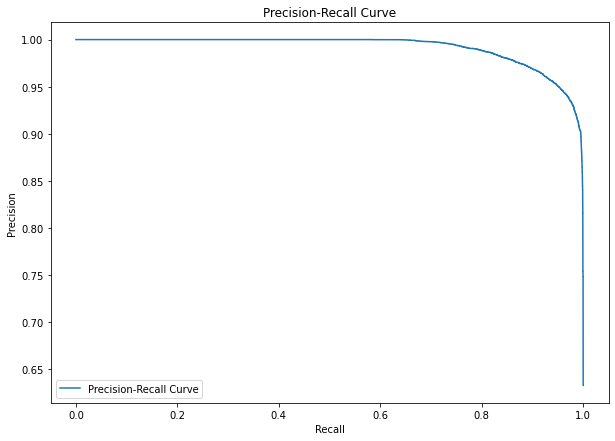

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn = KNeighborsClassifier(n_neighbors=4)
lr = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001, max_iter=5000)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('knn', knn), ('lr', lr)], voting='soft')
 
# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# KNN + AB

Accuracy: 0.9367
Precision: 0.8946
Recall: 0.9911
F1 Score: 0.9404
AUC: 0.9946

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18230
           1       0.89      0.99      0.94     18511

    accuracy                           0.94     36741
   macro avg       0.94      0.94      0.94     36741
weighted avg       0.94      0.94      0.94     36741



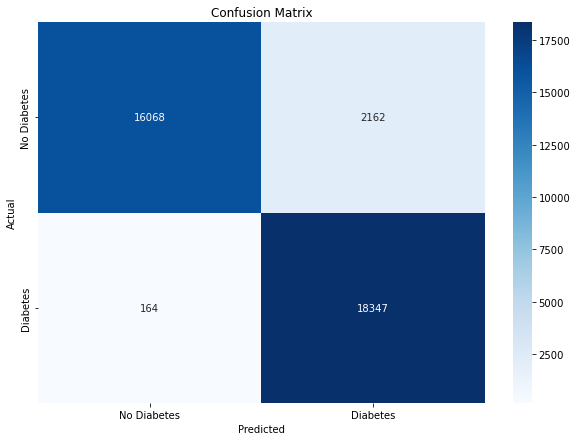

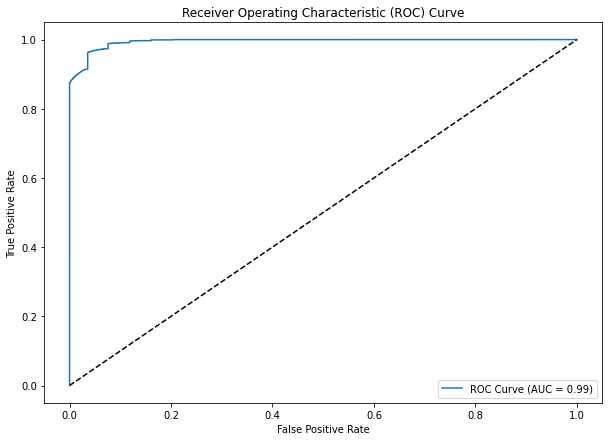

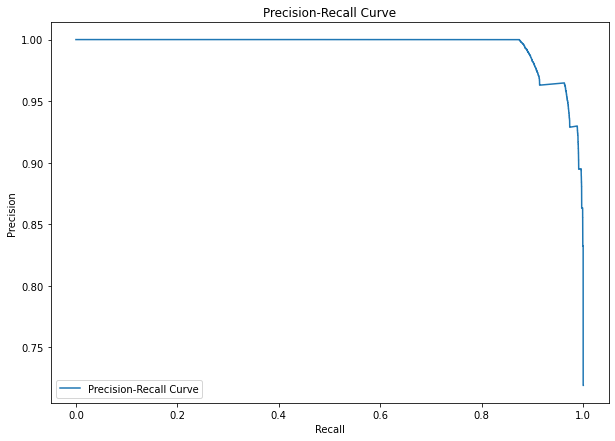

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn = KNeighborsClassifier(n_neighbors=5)
ada_boost = AdaBoostClassifier(n_estimators=1000, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('knn', knn), ('ada', ada_boost)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()  

# KNN + XB

Accuracy: 0.9708
Precision: 0.9538
Recall: 0.9901
F1 Score: 0.9716
AUC: 0.9984

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     18230
           1       0.95      0.99      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



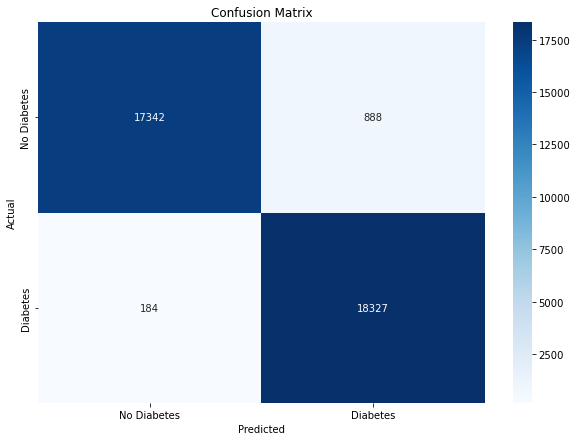

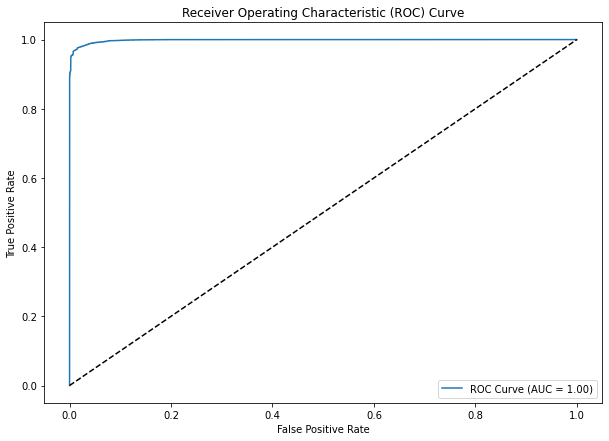

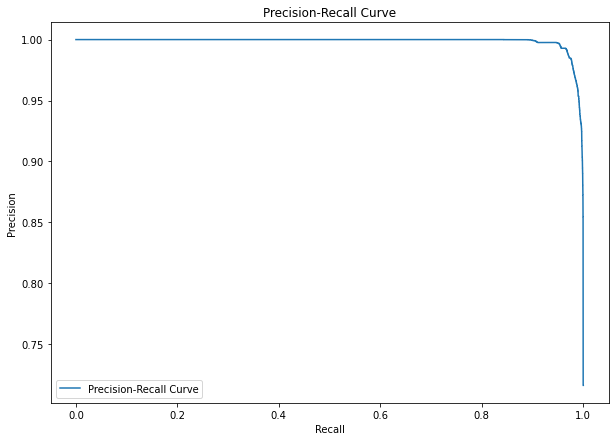

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn = KNeighborsClassifier(n_neighbors=4)
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=20, random_state=42, 
                          tree_method = "hist", device = "cuda")

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb_model)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# KNN + Bagging

Accuracy: 0.9696
Precision: 0.9500
Recall: 0.9918
F1 Score: 0.9705
AUC: 0.9986

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     18230
           1       0.95      0.99      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



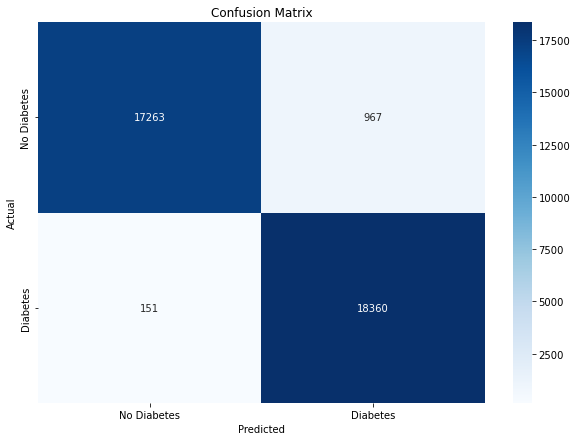

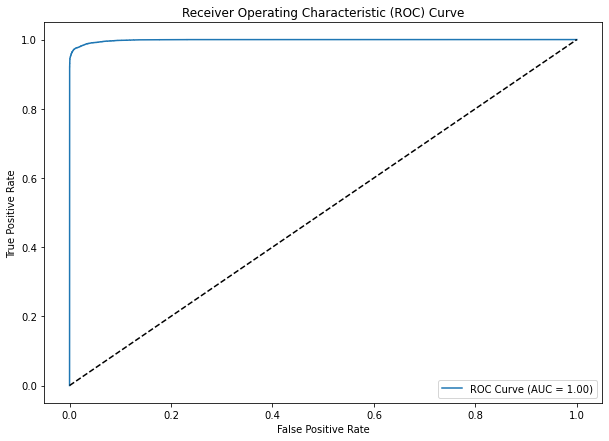

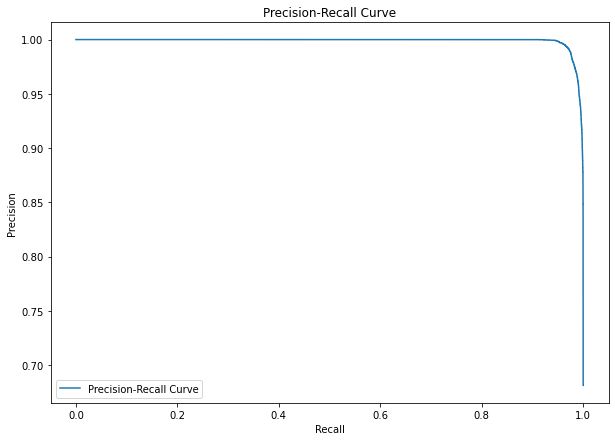

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn = KNeighborsClassifier(n_neighbors=4)
bagging_clf = BaggingClassifier(
    n_estimators=1000,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('knn', knn), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()                  

# RF + LR

Accuracy: 0.9653
Precision: 0.9668
Recall: 0.9641
F1 Score: 0.9655
AUC: 0.9950

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     18230
           1       0.97      0.96      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



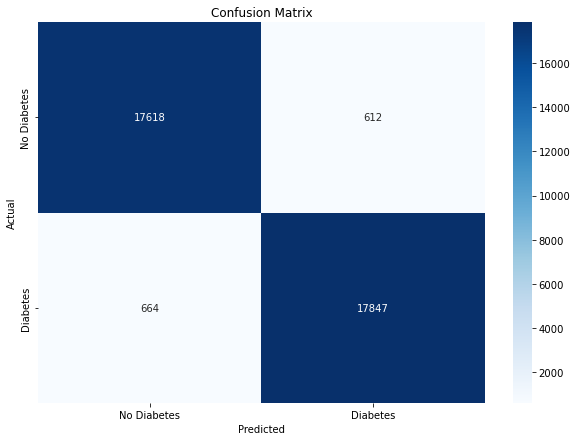

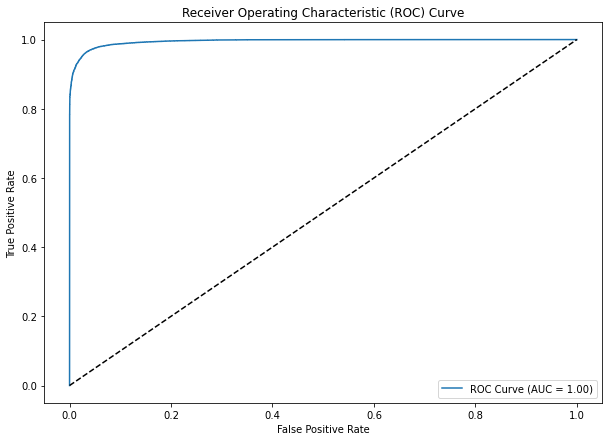

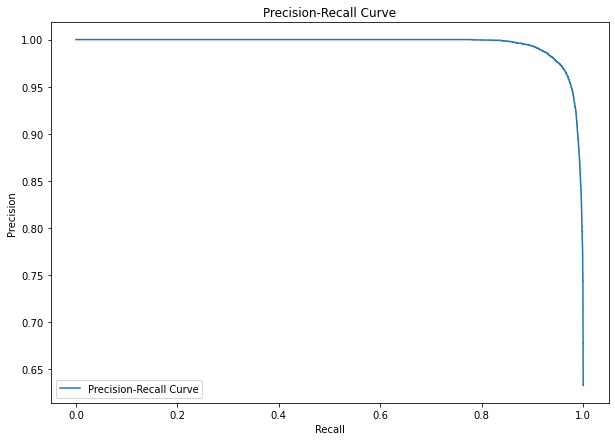

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=300, random_state=42)
lr = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001, max_iter=5000)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# RF + AB

Accuracy: 0.9779
Precision: 0.9823
Recall: 0.9736
F1 Score: 0.9779
AUC: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18230
           1       0.98      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



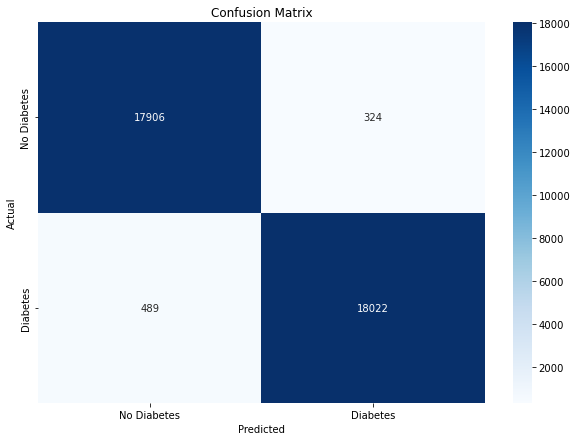

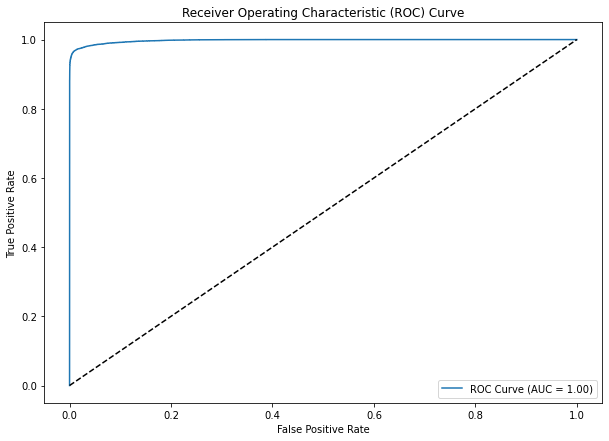

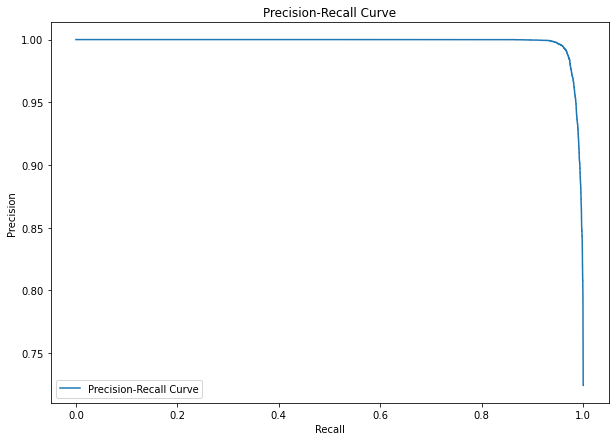

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=200, random_state=42)
ada_boost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('ada', ada_boost)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# RF + XB

Accuracy: 0.9810
Precision: 0.9885
Recall: 0.9736
F1 Score: 0.9810
AUC: 0.9978

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



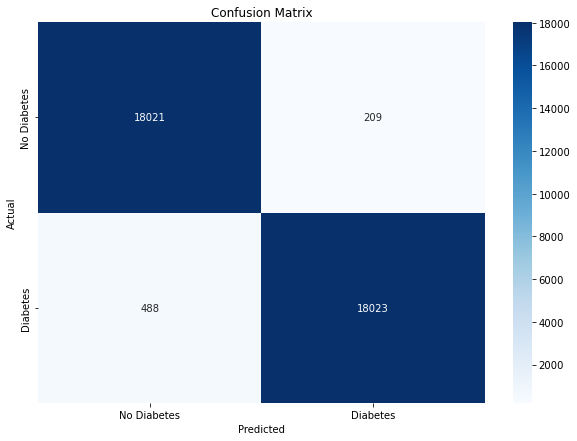

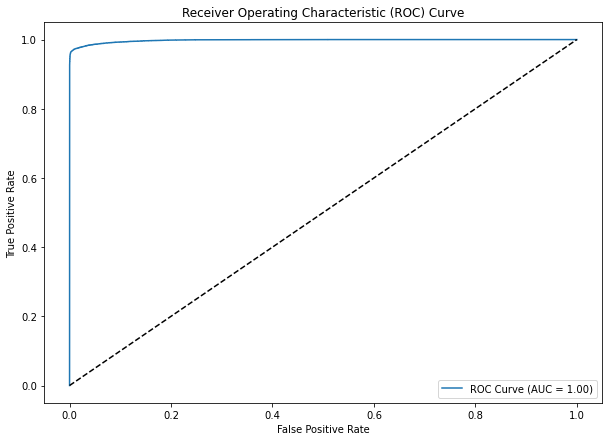

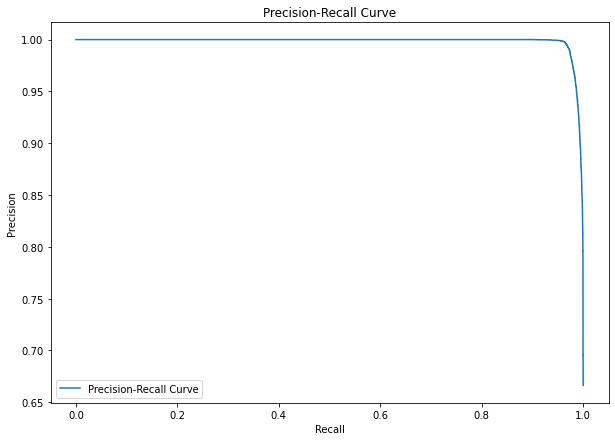

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=16, random_state=42, 
                          tree_method="hist", device = "cuda")

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_model)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics 
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# RF + BAG

Accuracy: 0.9828
Precision: 0.9915
Recall: 0.9742
F1 Score: 0.9828
AUC: 0.9979

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



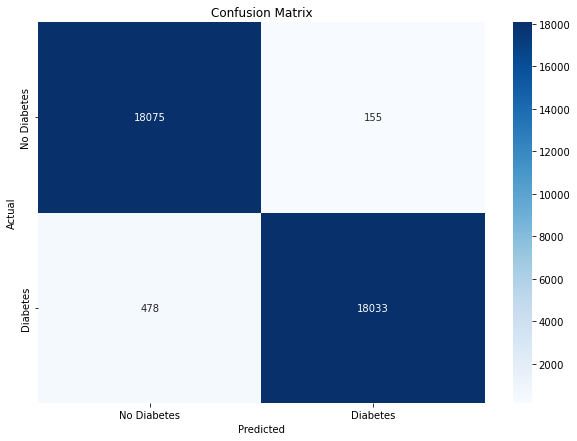

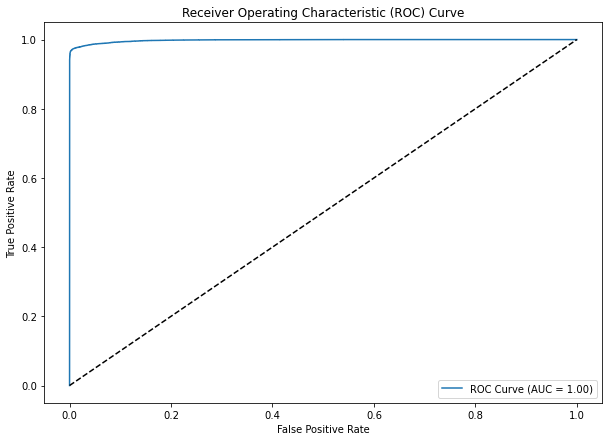

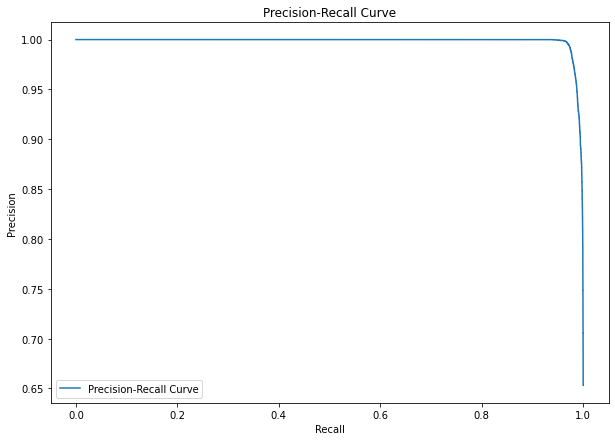

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=300, random_state=42)
bagging_clf = BaggingClassifier(
    n_estimators=1200,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# LR + AB

Accuracy: 0.9093
Precision: 0.9177
Recall: 0.9007
F1 Score: 0.9091
AUC: 0.9786

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     18230
           1       0.92      0.90      0.91     18511

    accuracy                           0.91     36741
   macro avg       0.91      0.91      0.91     36741
weighted avg       0.91      0.91      0.91     36741



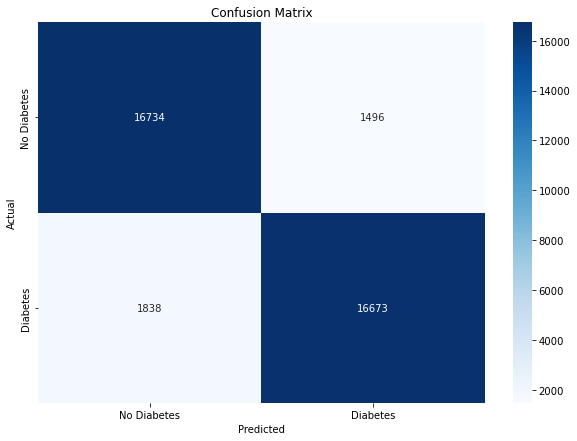

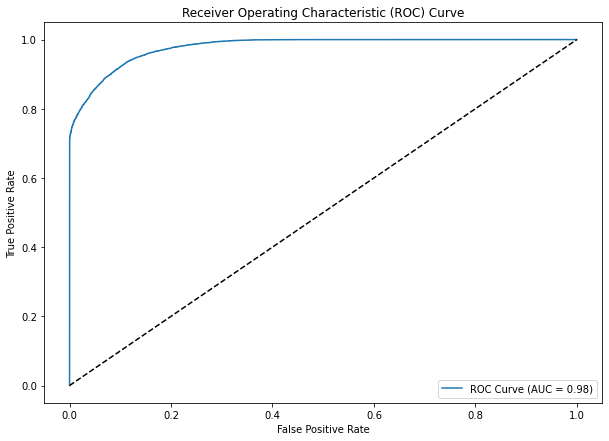

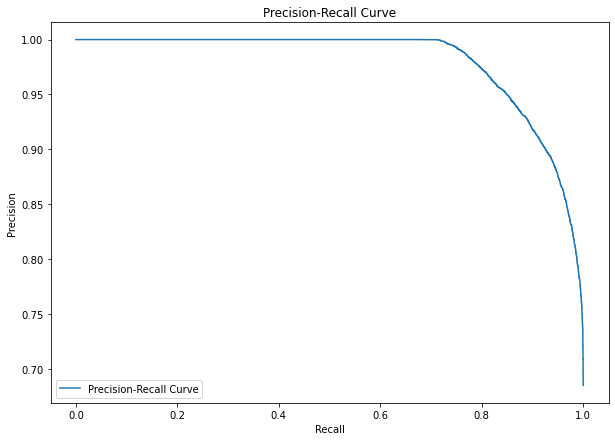

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
lr = LogisticRegression(C=1.0, max_iter=5000)
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('lr', lr), ('ada', ada_boost)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')     
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# LR + XB

Accuracy: 0.9775
Precision: 0.9822
Recall: 0.9730
F1 Score: 0.9776
AUC: 0.9956

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18230
           1       0.98      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



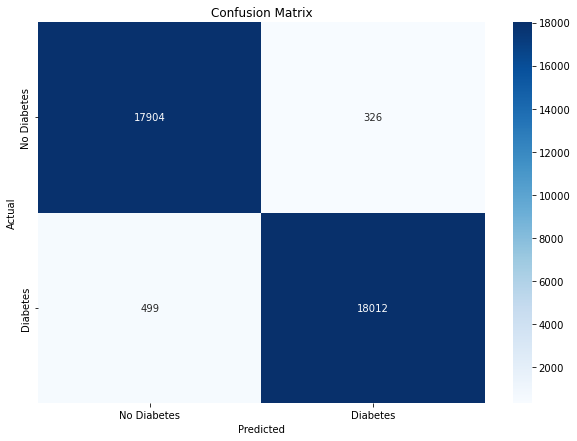

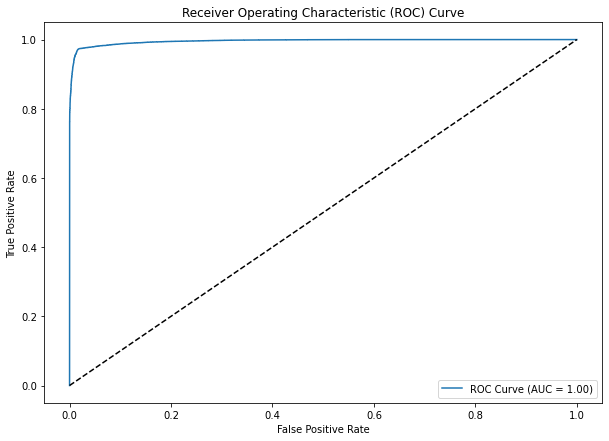

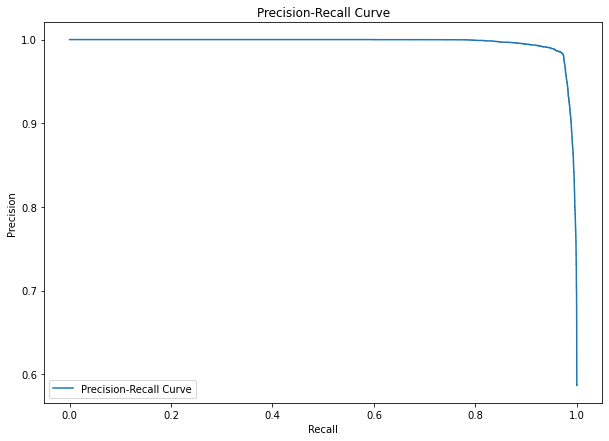

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
lr = LogisticRegression(C=1.0, max_iter=5000)
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=20, random_state=42, 
                          tree_method= "hist", device = "cuda")

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb_model)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 

# LR + BAG

Accuracy: 0.9714
Precision: 0.9745
Recall: 0.9687
F1 Score: 0.9716
AUC: 0.9962

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741



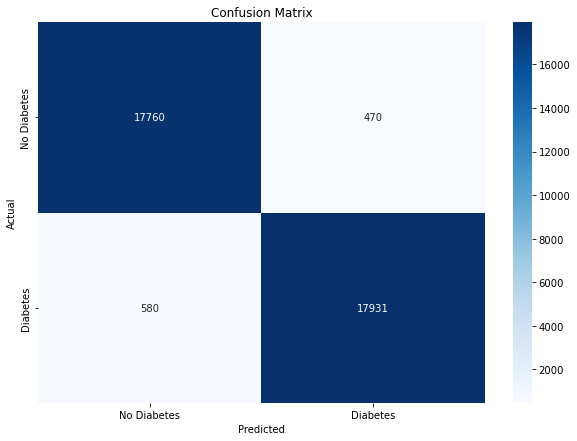

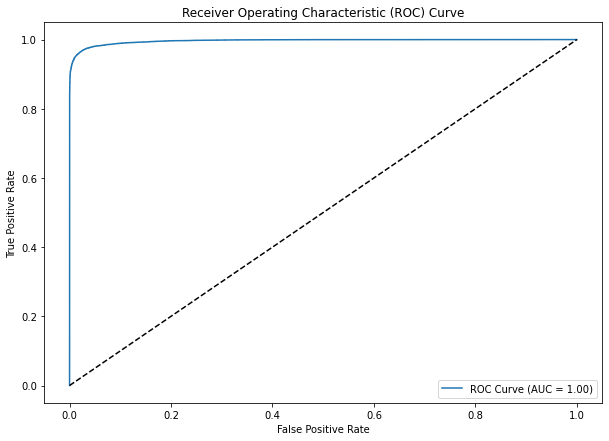

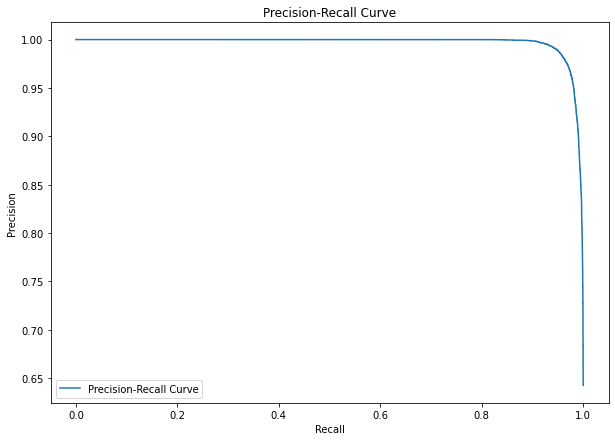

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
lr = LogisticRegression(C=1.0, max_iter=5000)
bagging_clf = BaggingClassifier(
    n_estimators=1000,  # Number of base estimators
    max_samples=0.7,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.9,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('lr', lr), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# AB +XB

Accuracy: 0.9799
Precision: 0.9889
Recall: 0.9709
F1 Score: 0.9798
AUC: 0.9976

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



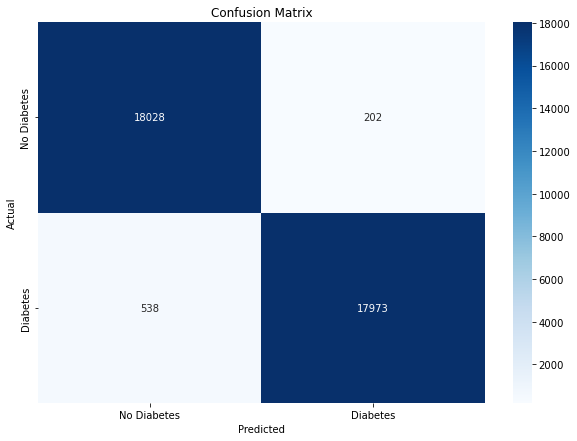

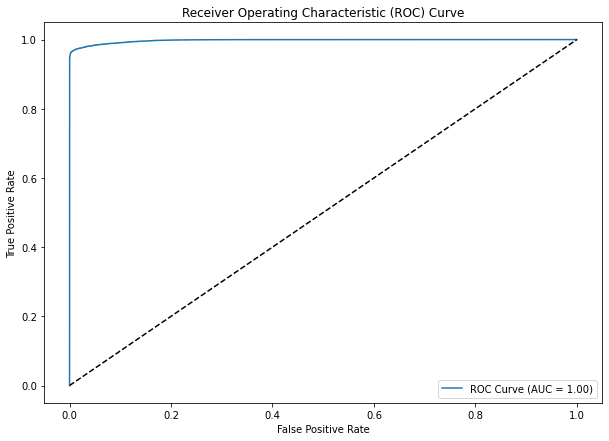

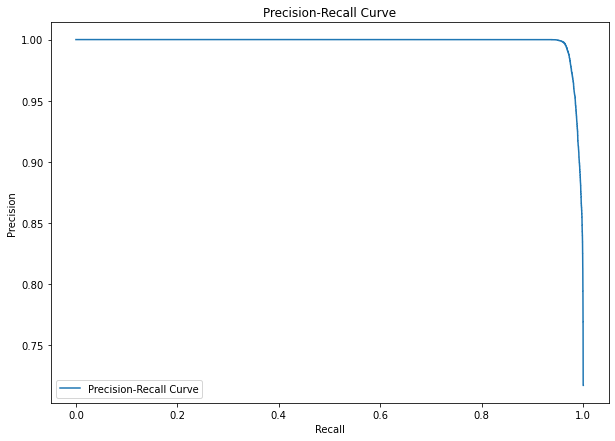

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=16, random_state=42, 
                          tree_method= "hist", device = "cuda")

# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('ada', ada_boost), ('xgb', xgb_model)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# AB + BAG

Accuracy: 0.9832
Precision: 0.9959
Recall: 0.9706
F1 Score: 0.9831
AUC: 0.9981

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18230
           1       1.00      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



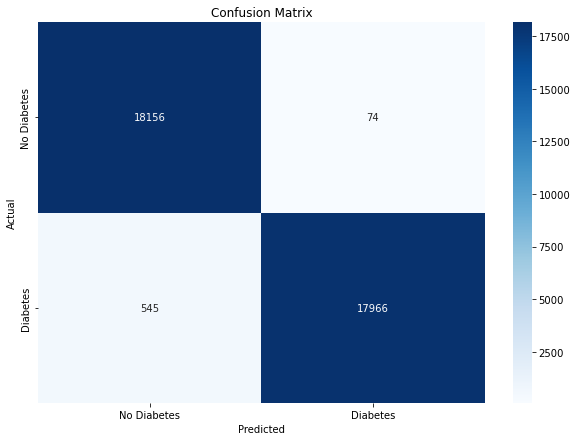

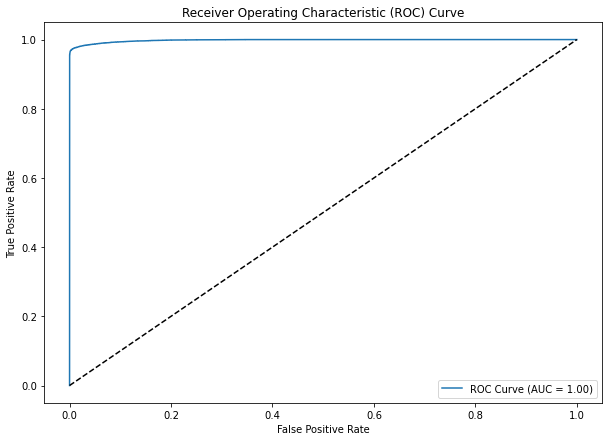

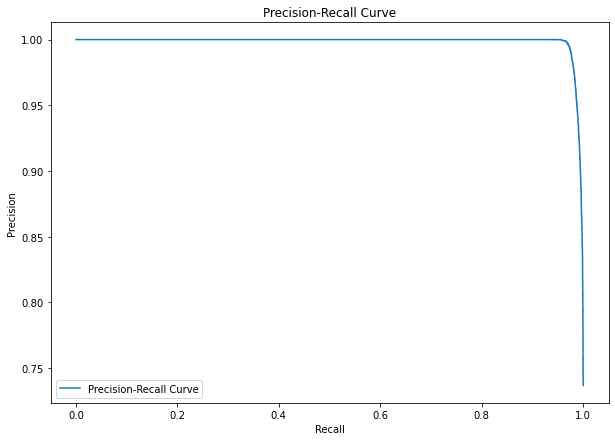

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
bagging_clf = BaggingClassifier(
    n_estimators=1200,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)
# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('ada', ada_boost), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test) 
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() 


# XB + BAG

Accuracy: 0.9827
Precision: 0.9923
Recall: 0.9731
F1 Score: 0.9826
AUC: 0.9979

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



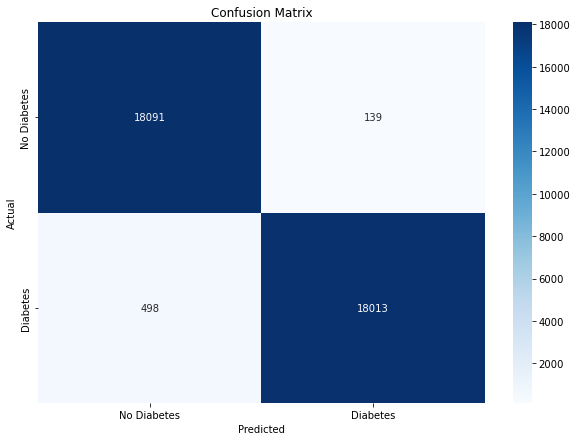

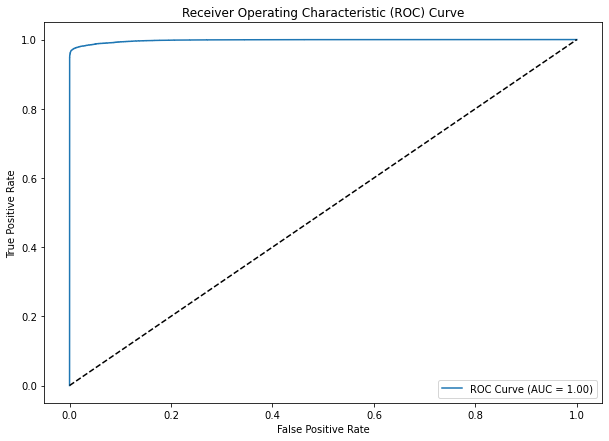

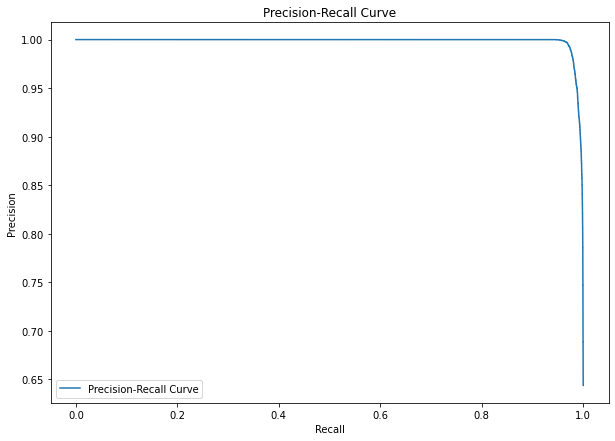

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=42, 
                          tree_method="hist", device = "cuda")
bagging_clf = BaggingClassifier(
    n_estimators=1200,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)
# Create a Voting Classifier with soft voting
ensemble_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('bagging', bagging_clf)], voting='soft')

# Train the Voting Classifier
ensemble_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ensemble_clf.predict(X_test)
y_pred_prob = ensemble_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# Combined

/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:38:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516861647/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Decision Tree Accuracy: 0.969344262295082
Decision Tree Precision: 0.9676789587852495
Decision Tree Recall: 0.9713663581927054
Decision Tree F1 Score: 0.969519152404238
Decision Tree AUC: 0.9695339909121069
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18370

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Sample results for Decision Tree:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


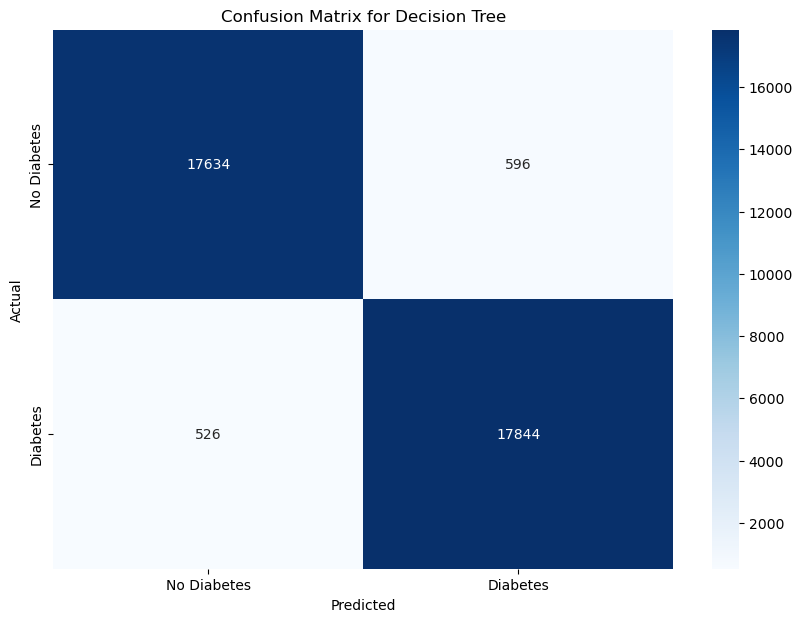

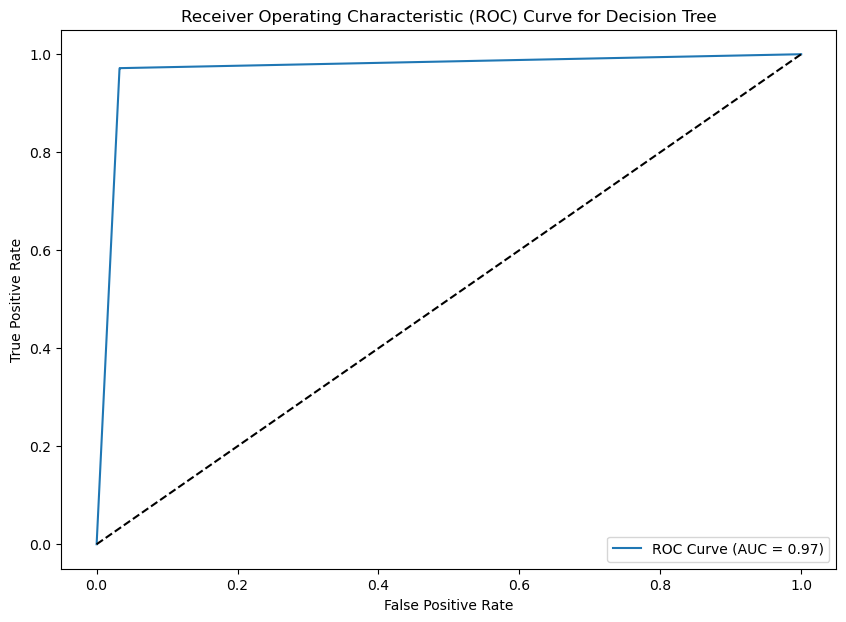

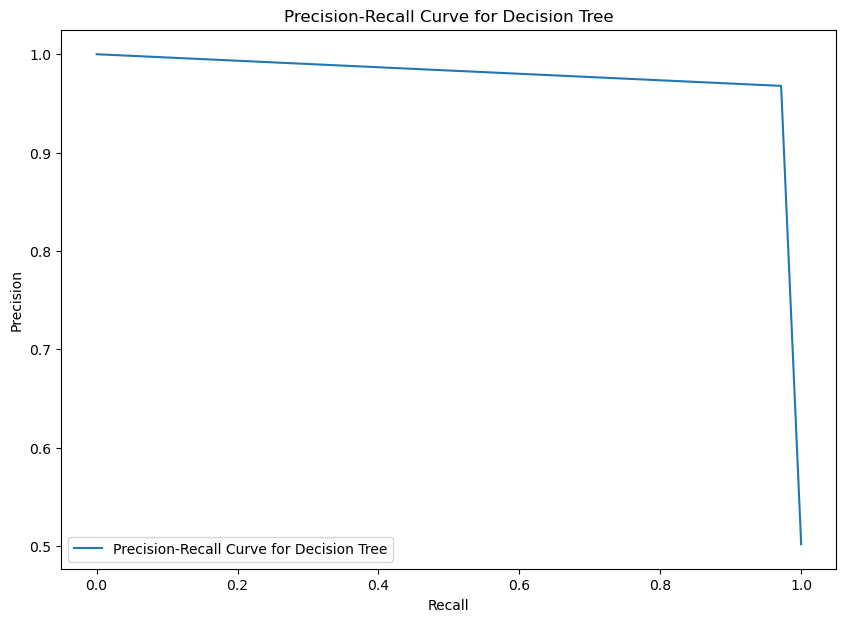

KNN Accuracy: 0.9452459016393443
KNN Precision: 0.9138262364721351
KNN Recall: 0.9836690255851932
KNN F1 Score: 0.9474622483221476
KNN AUC: 0.9826938269275044
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     18230
           1       0.91      0.98      0.95     18370

    accuracy                           0.95     36600
   macro avg       0.95      0.95      0.95     36600
weighted avg       0.95      0.95      0.95     36600

Sample results for KNN:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


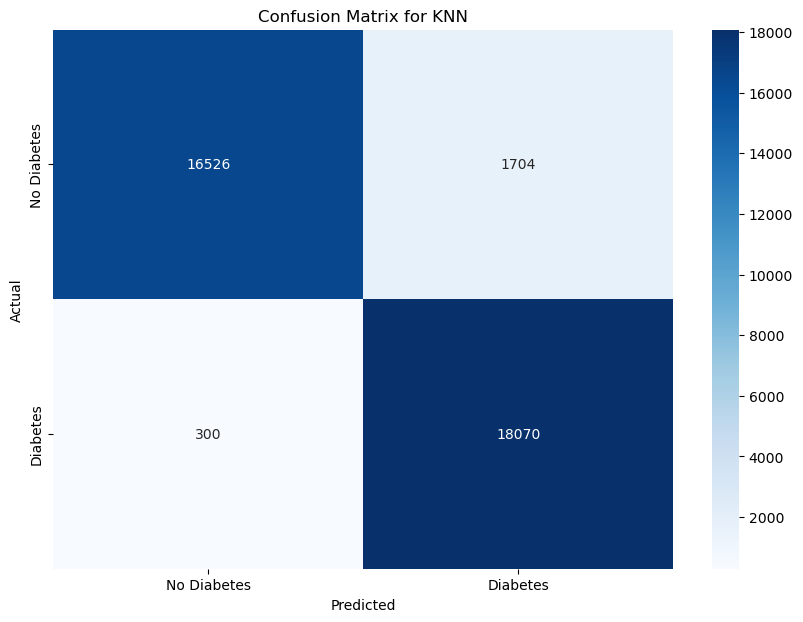

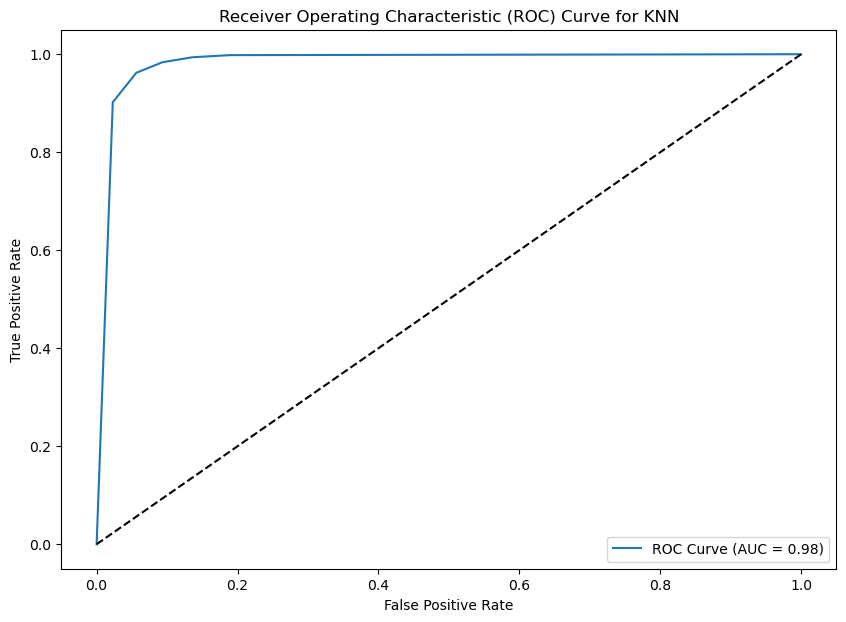

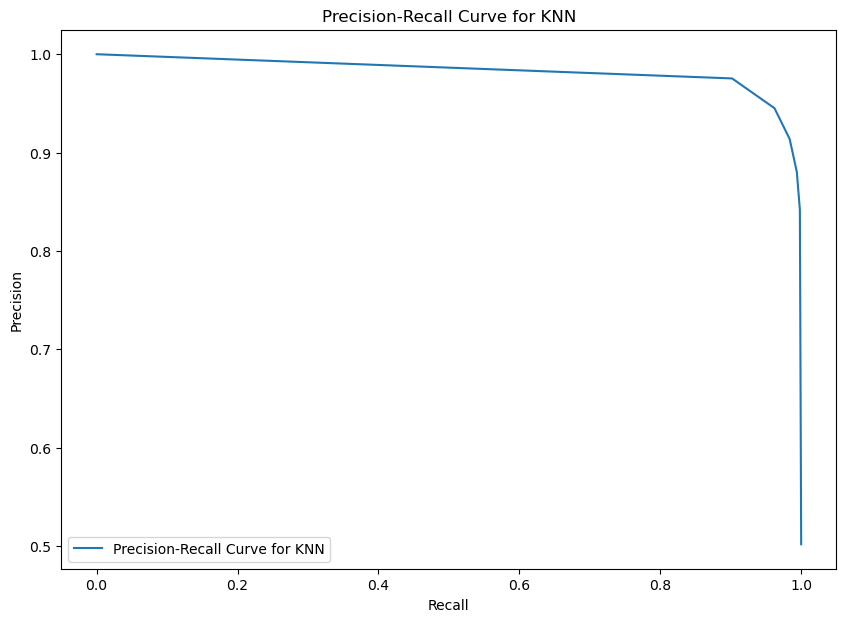

Random Forest Accuracy: 0.9782513661202186
Random Forest Precision: 0.9856305957776058
Random Forest Recall: 0.9708219923788786
Random Forest F1 Score: 0.9781702501096973
Random Forest AUC: 0.9971414225356696
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for Random Forest:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


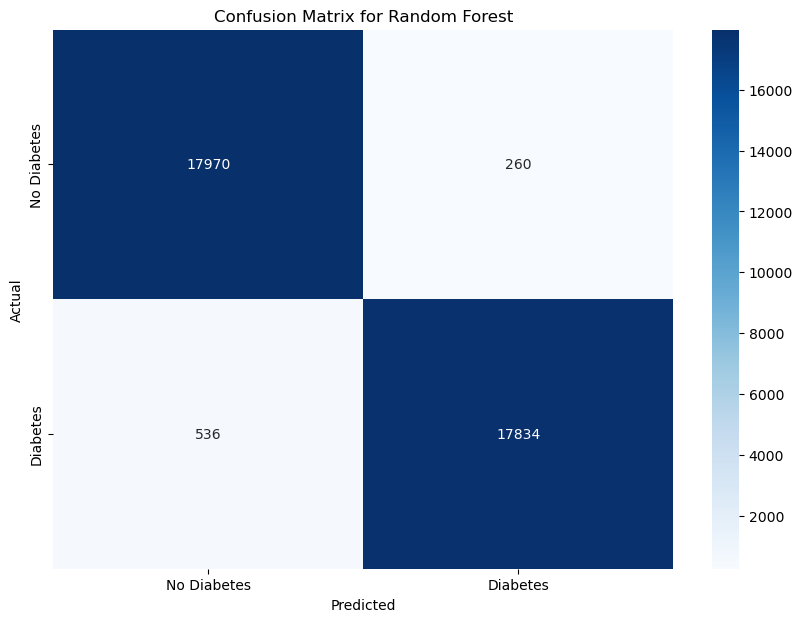

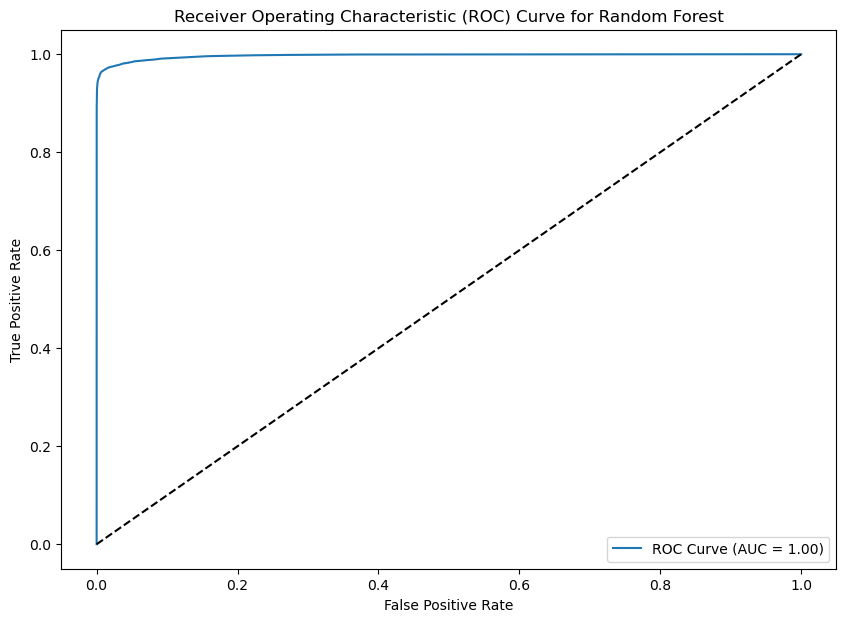

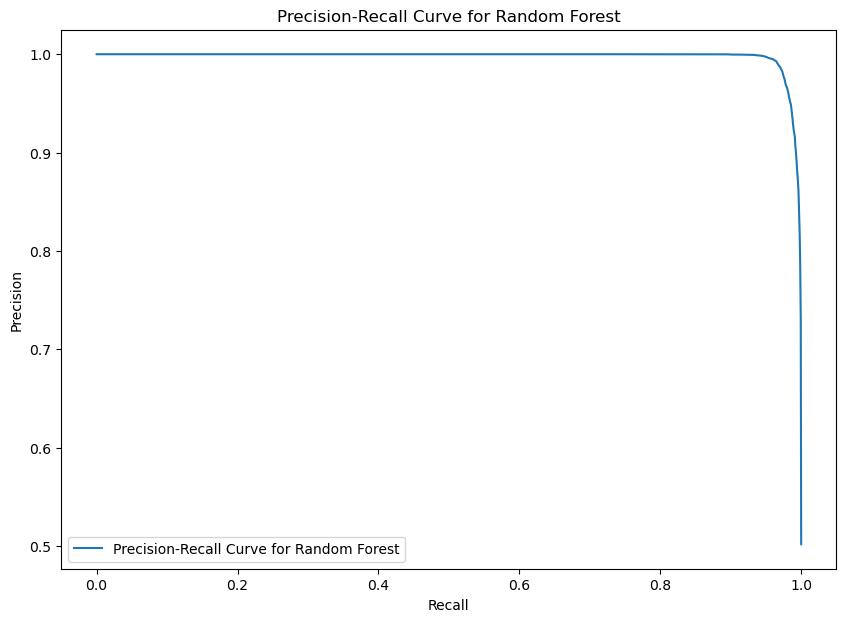

Logistic Regression Accuracy: 0.9305737704918032
Logistic Regression Precision: 0.9431659107452824
Logistic Regression Recall: 0.9169297768100163
Logistic Regression F1 Score: 0.9298628170802395
Logistic Regression AUC: 0.9856413990947941
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18230
           1       0.94      0.92      0.93     18370

    accuracy                           0.93     36600
   macro avg       0.93      0.93      0.93     36600
weighted avg       0.93      0.93      0.93     36600

Sample results for Logistic Regression:
    Actual  Predicted
0       1          1
1       0          1
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


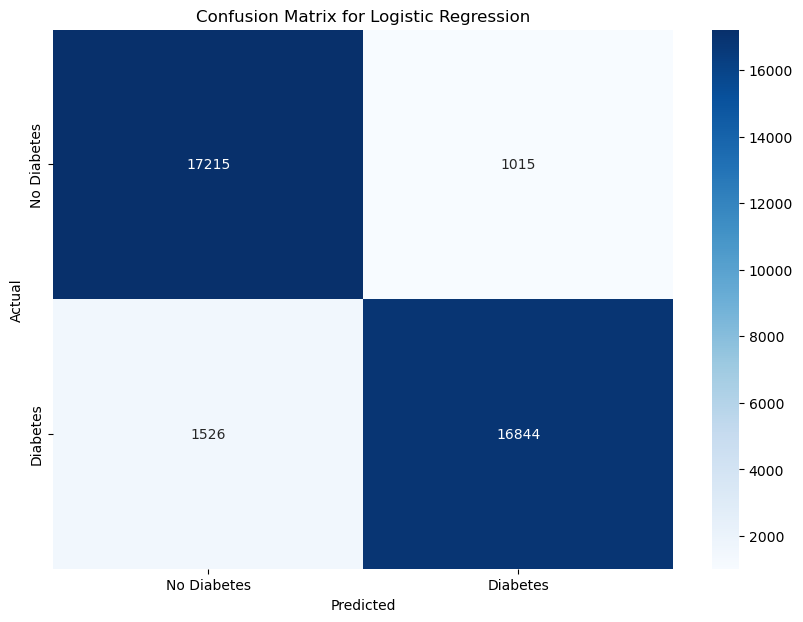

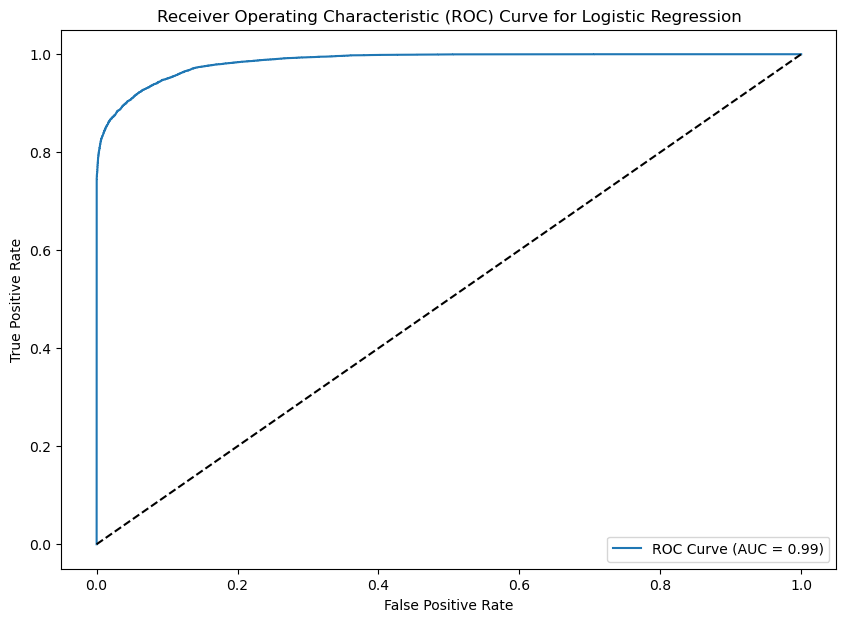

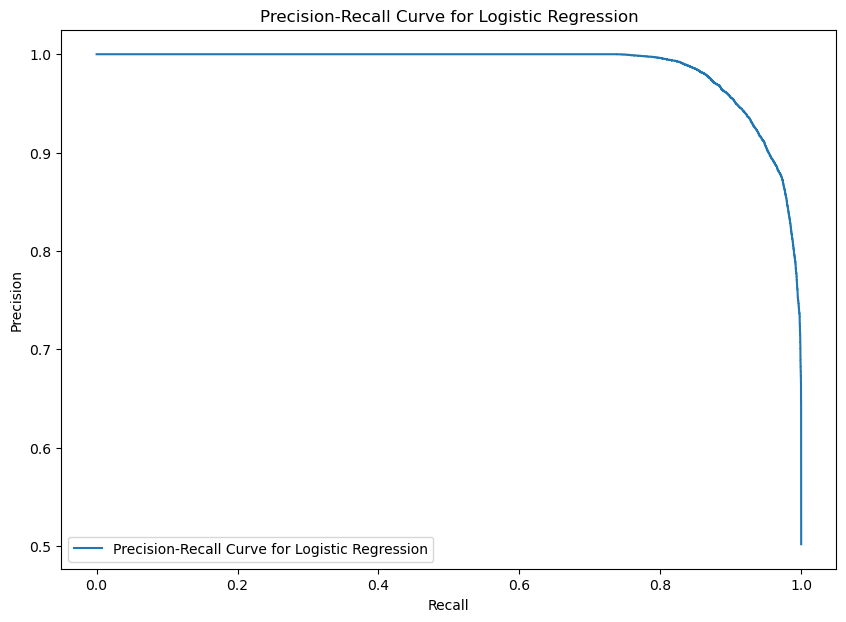

AdaBoost Accuracy: 0.9625683060109289
AdaBoost Precision: 0.9704970663124101
AdaBoost Recall: 0.9544365813826892
AdaBoost F1 Score: 0.9623998243495444
AdaBoost AUC: 0.9947473222905409
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18230
           1       0.97      0.95      0.96     18370

    accuracy                           0.96     36600
   macro avg       0.96      0.96      0.96     36600
weighted avg       0.96      0.96      0.96     36600

Sample results for AdaBoost:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


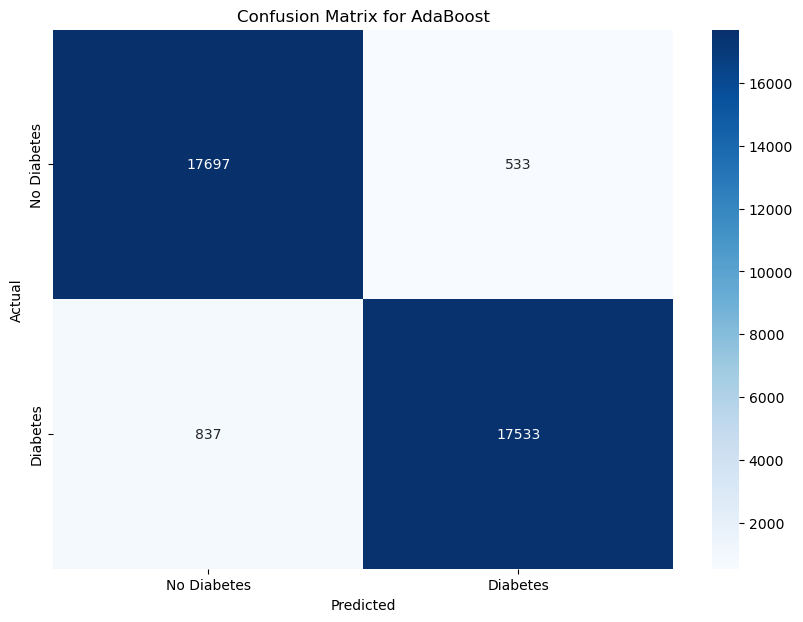

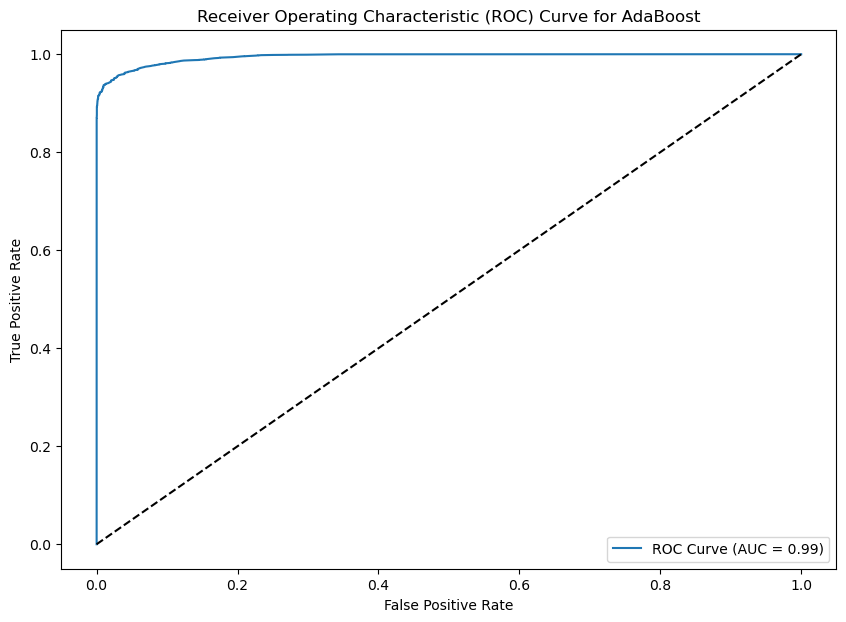

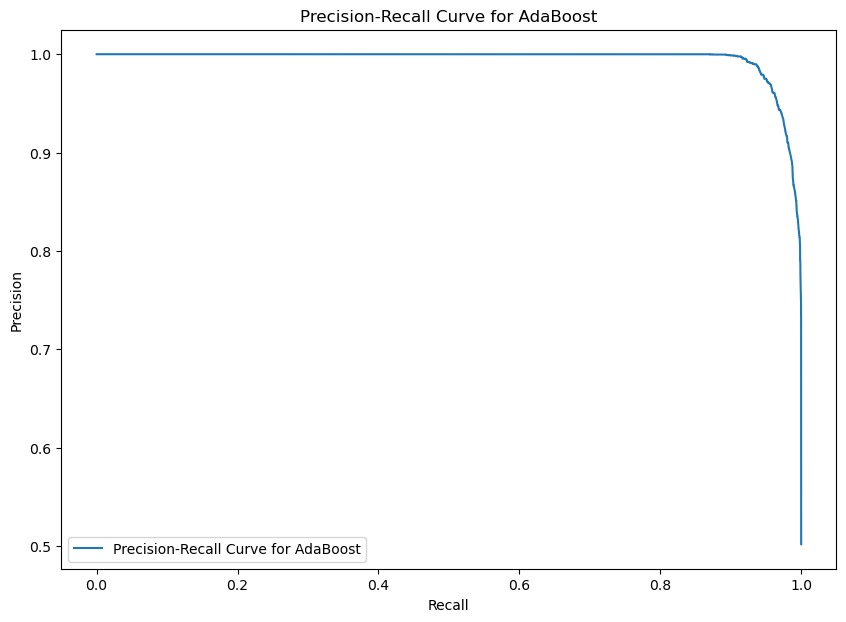

XGBoost Accuracy: 0.9765846994535519
XGBoost Precision: 0.9928519164743626
XGBoost Recall: 0.9602612955906369
XGBoost F1 Score: 0.9762846943575837
XGBoost AUC: 0.9972275565559651
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18230
           1       0.99      0.96      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for XGBoost:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


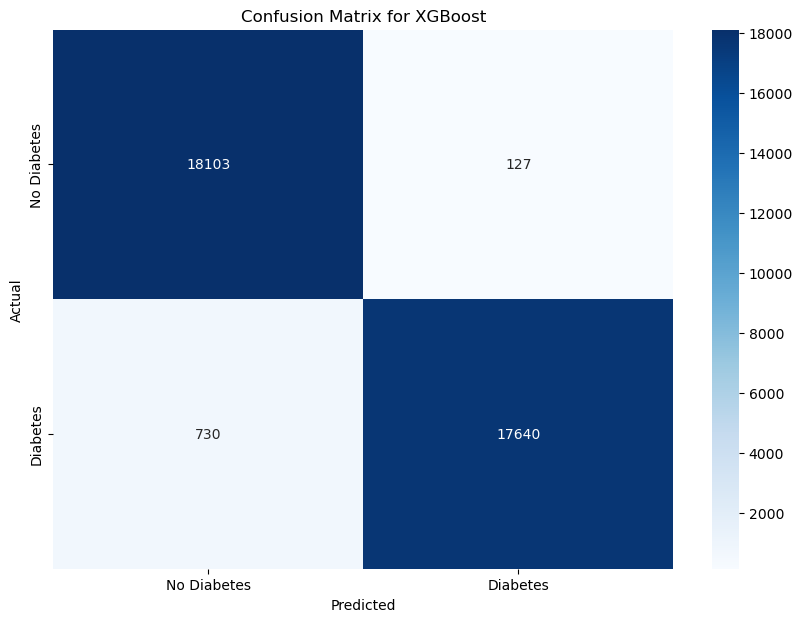

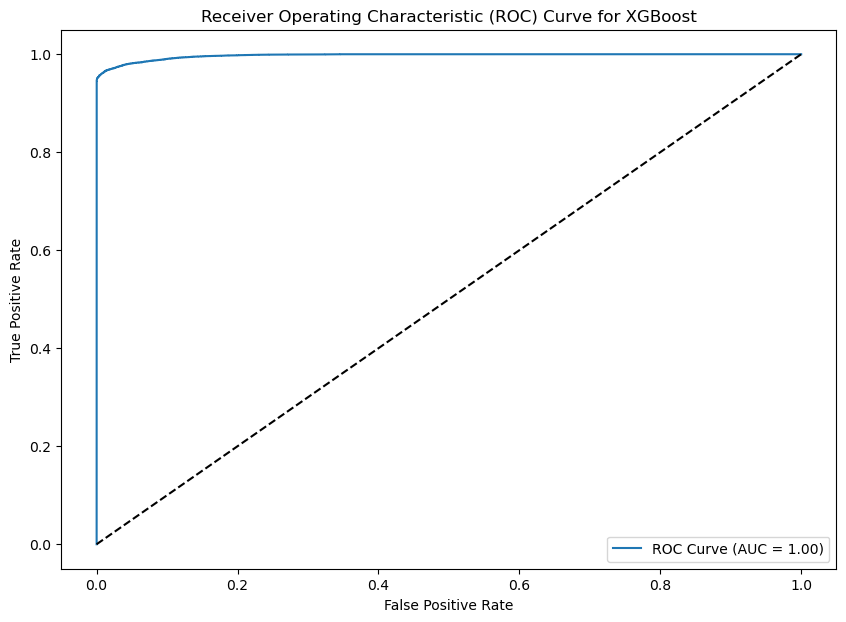

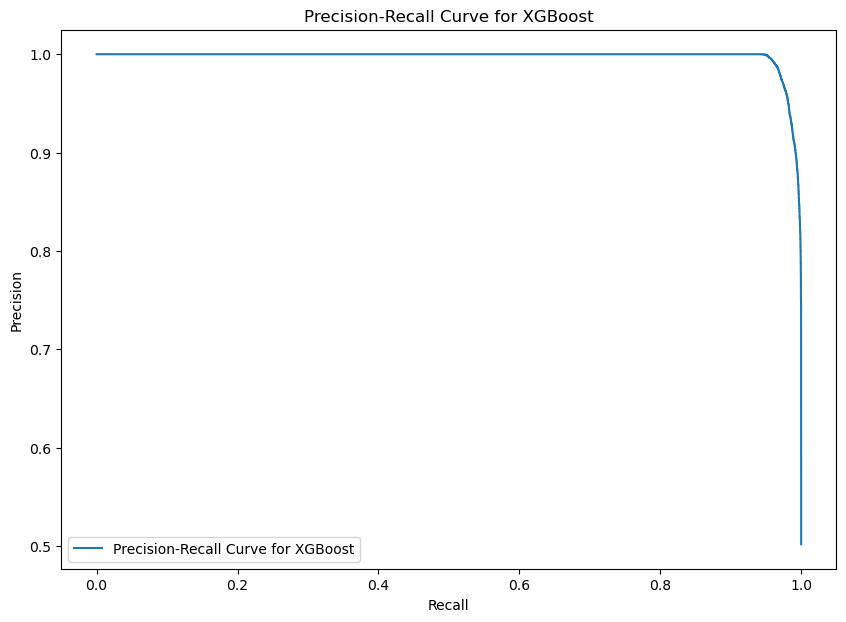

/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:40:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516861647/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/envs/rapids-24.08/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the def

Combined DT + RF + KNN Accuracy: 0.9756830601092896
Combined DT + RF + KNN Precision: 0.974793568013907
Combined DT + RF + KNN Recall: 0.9768100163309744
Combined DT + RF + KNN F1 Score: 0.9758007504486378
Combined DT + RF + KNN AUC: 0.9978394216404372
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18230
           1       0.97      0.98      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for Combined DT + RF + KNN:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


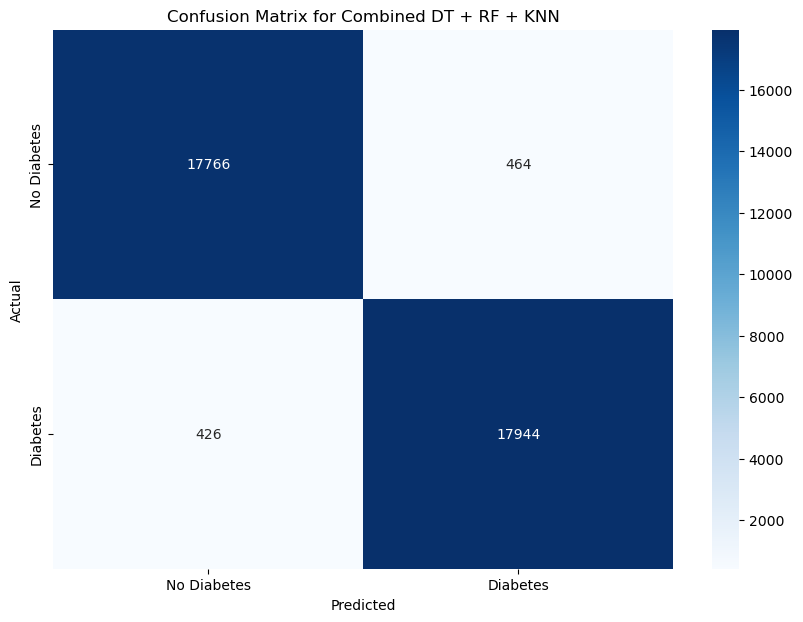

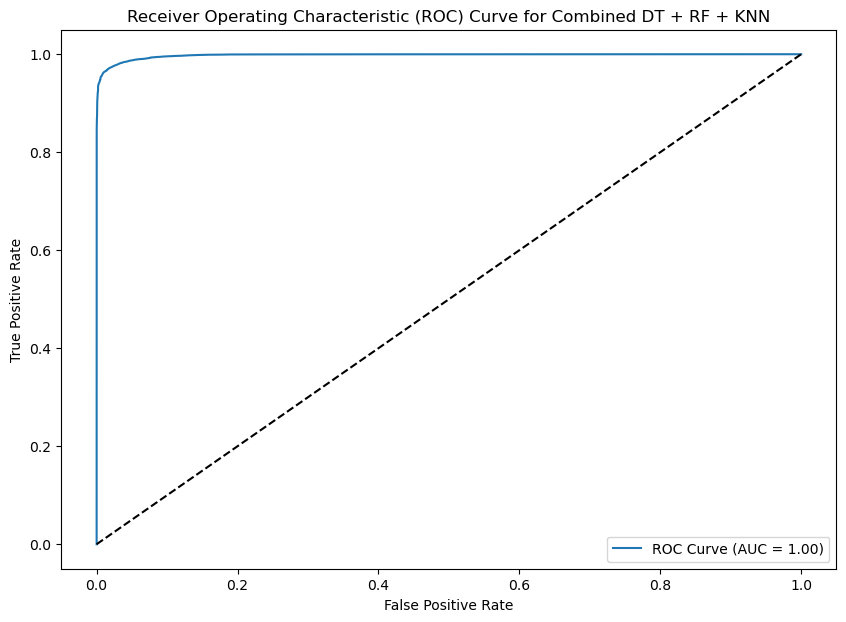

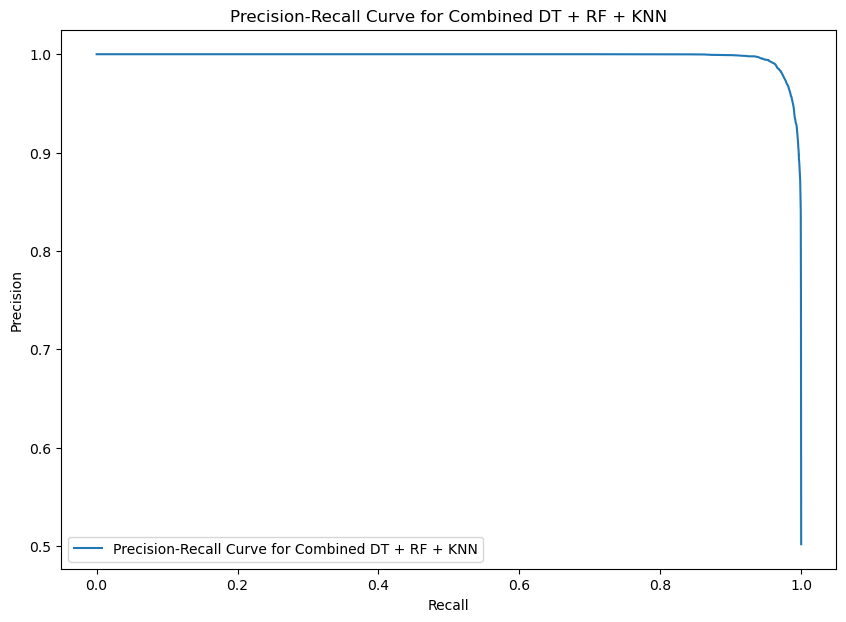

Combined DT + RF + LR Accuracy: 0.9755464480874317
Combined DT + RF + LR Precision: 0.9788983283091258
Combined DT + RF + LR Recall: 0.9722373434948285
Combined DT + RF + LR F1 Score: 0.9755564659292639
Combined DT + RF + LR AUC: 0.9964611757883525
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18230
           1       0.98      0.97      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for Combined DT + RF + LR:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


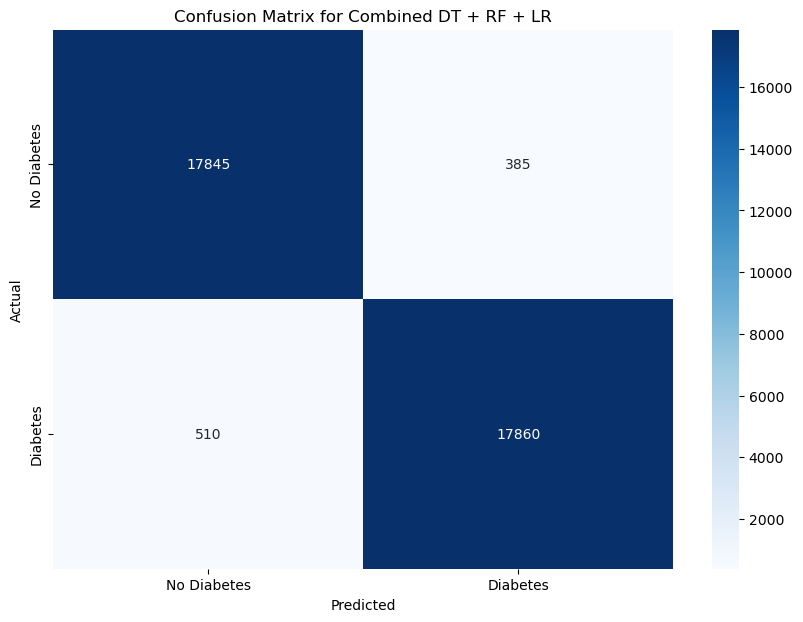

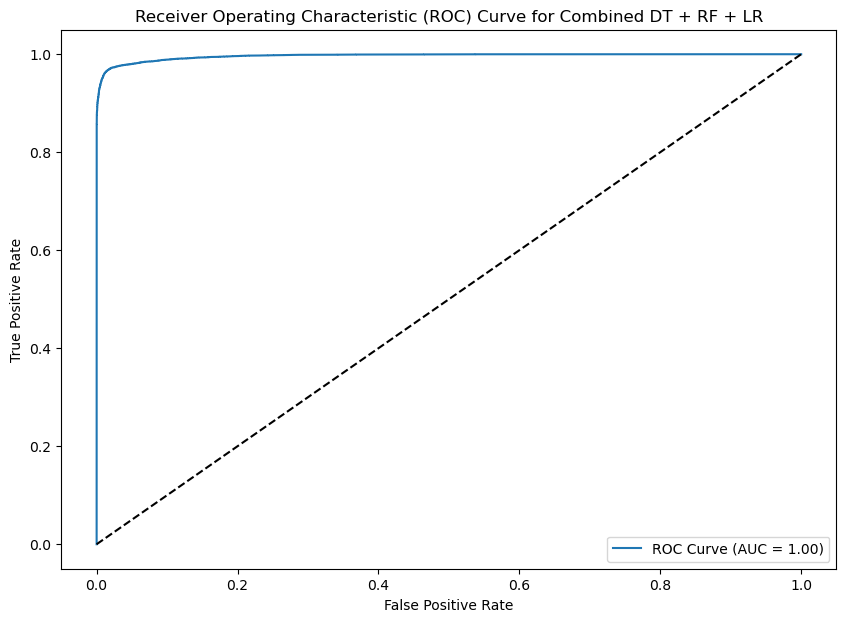

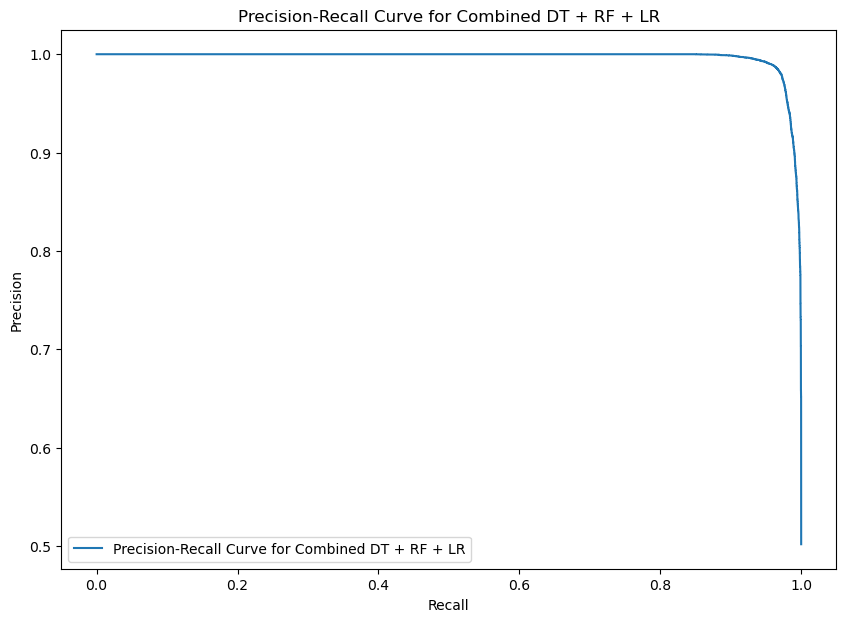

Combined KNN + RF + LR Accuracy: 0.9710382513661202
Combined KNN + RF + LR Precision: 0.9646231479493236
Combined KNN + RF + LR Recall: 0.9781709308655416
Combined KNN + RF + LR F1 Score: 0.9713498026920374
Combined KNN + RF + LR AUC: 0.9972199853024216
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18230
           1       0.96      0.98      0.97     18370

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Sample results for Combined KNN + RF + LR:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


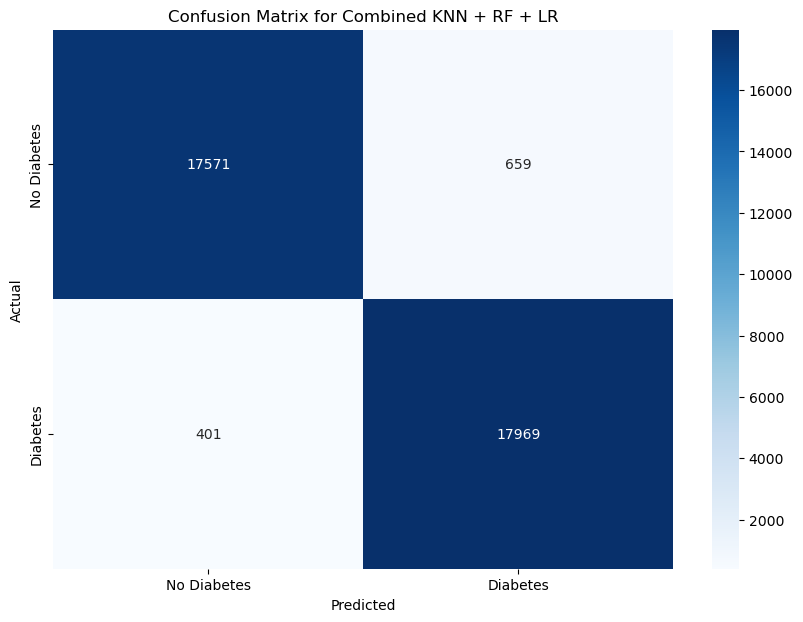

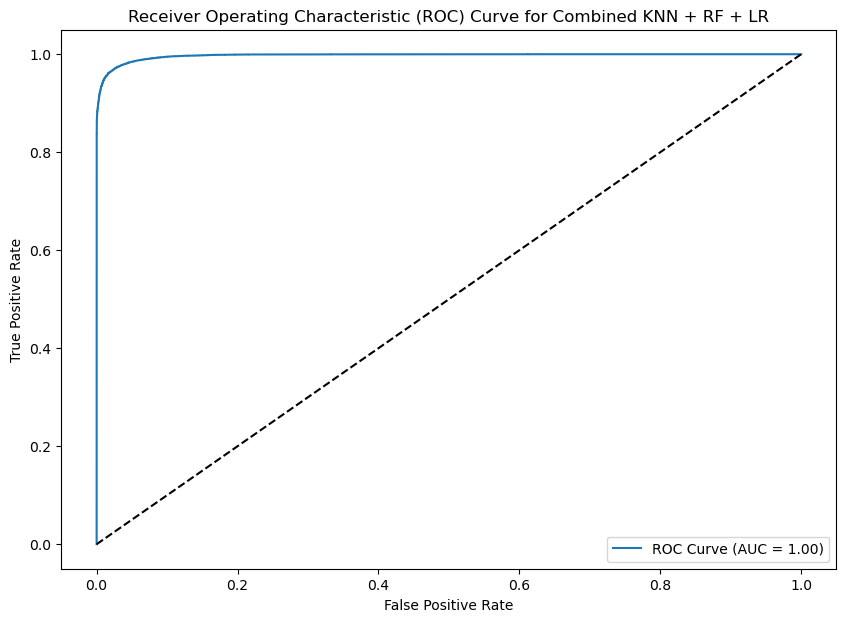

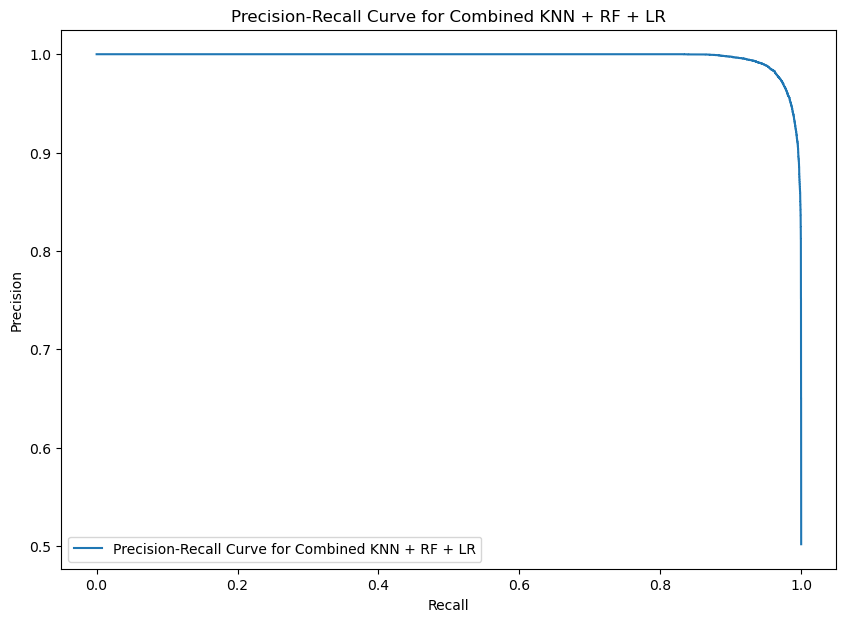

Combined DT + KNN + LR Accuracy: 0.9717486338797814
Combined DT + KNN + LR Precision: 0.966925231631114
Combined DT + KNN + LR Recall: 0.9771366358192706
Combined DT + KNN + LR F1 Score: 0.9720041154491796
Combined DT + KNN + LR AUC: 0.9968688230679716
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18230
           1       0.97      0.98      0.97     18370

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Sample results for Combined DT + KNN + LR:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


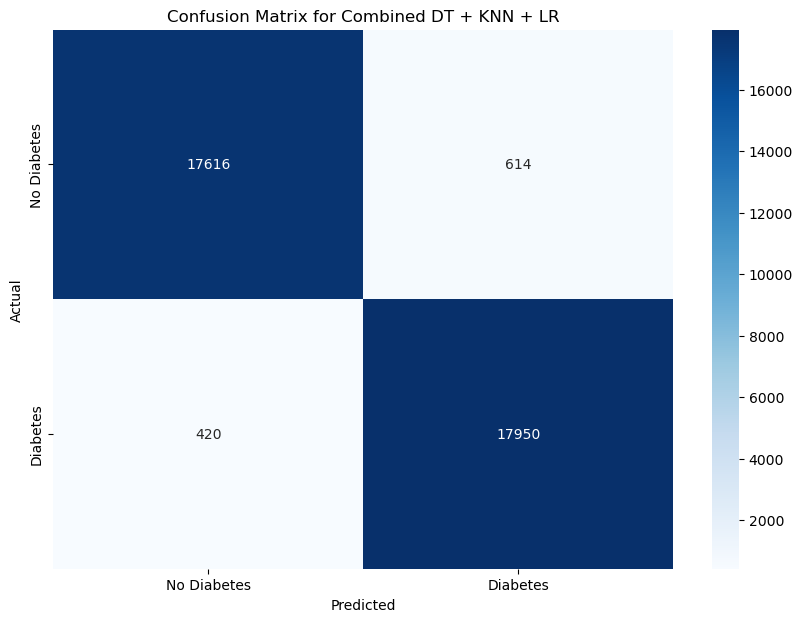

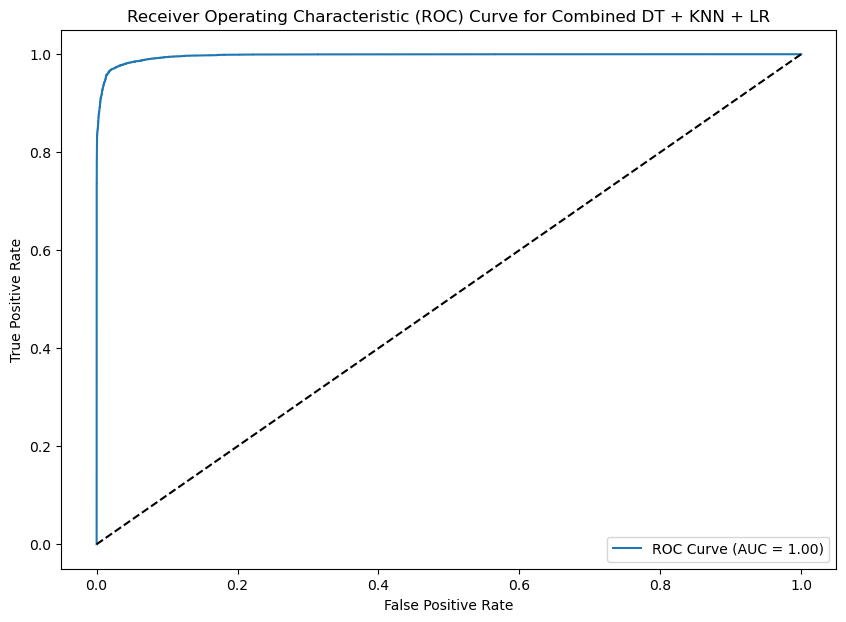

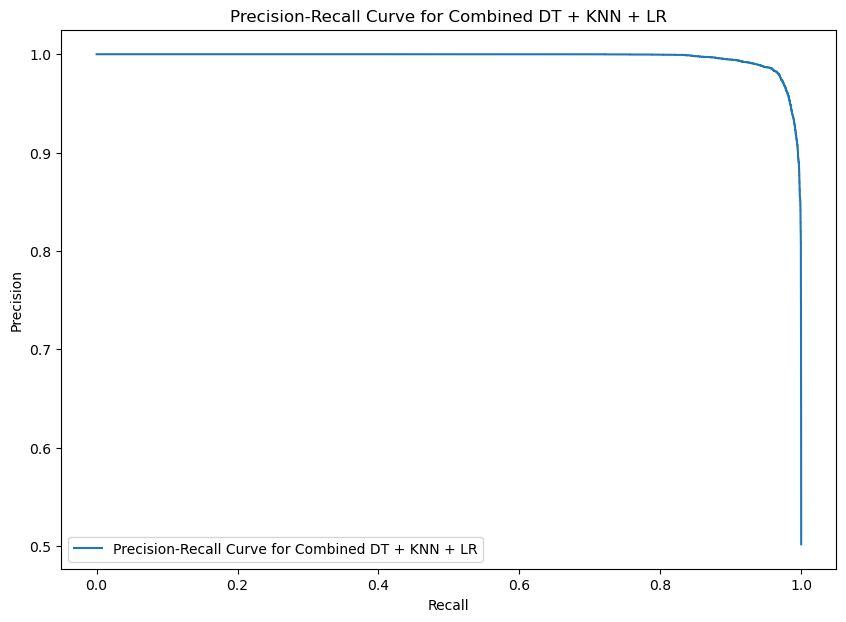

Combined RF + AdaBoost + XGBoost Accuracy: 0.9816120218579235
Combined RF + AdaBoost + XGBoost Precision: 0.9925958915548627
Combined RF + AdaBoost + XGBoost Recall: 0.9706042460533478
Combined RF + AdaBoost + XGBoost F1 Score: 0.9814768942834338
Combined RF + AdaBoost + XGBoost AUC: 0.997807975033825
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for Combined RF + AdaBoost + XGBoost:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


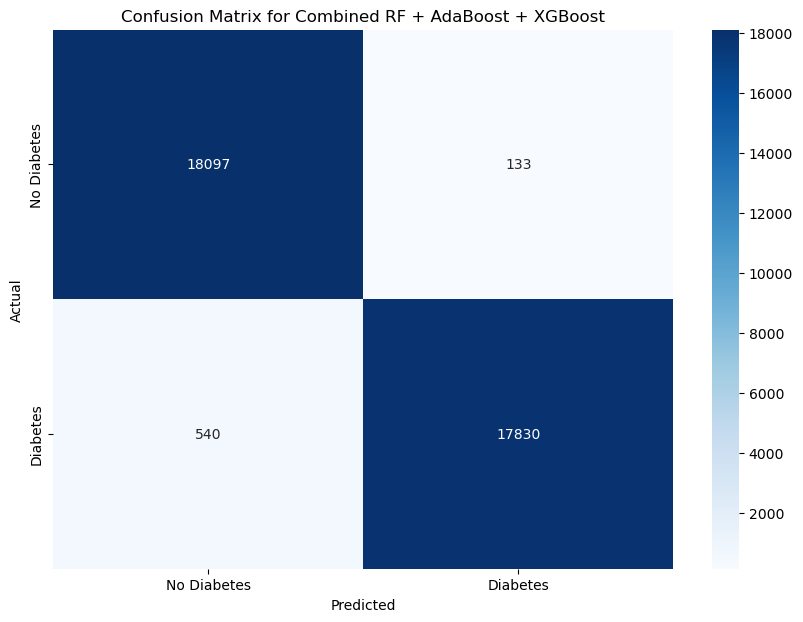

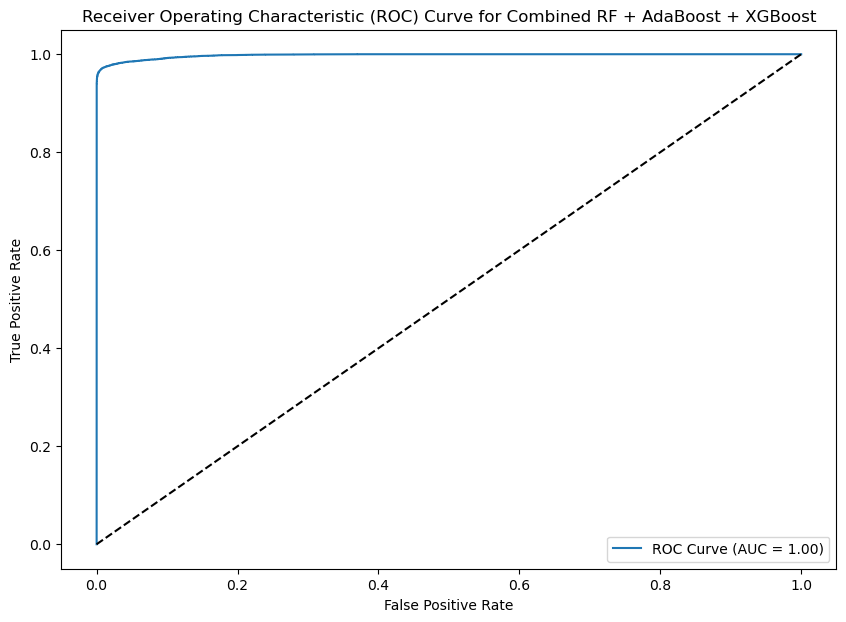

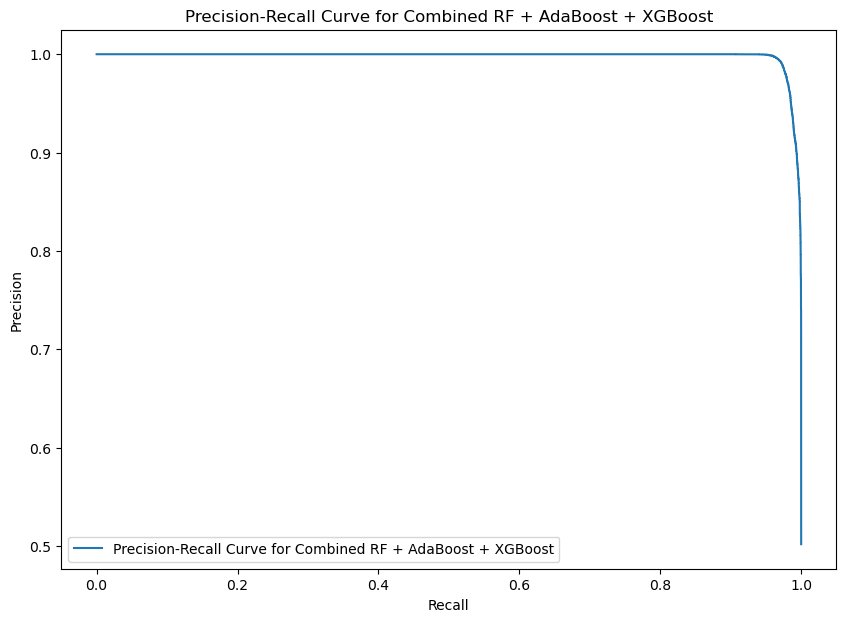

Combined DT + LR + AdaBoost Accuracy: 0.9704098360655737
Combined DT + LR + AdaBoost Precision: 0.9684062212106432
Combined DT + LR + AdaBoost Recall: 0.9727817093086554
Combined DT + LR + AdaBoost F1 Score: 0.9705890340276457
Combined DT + LR + AdaBoost AUC: 0.9949418755865819
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18230
           1       0.97      0.97      0.97     18370

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Sample results for Combined DT + LR + AdaBoost:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


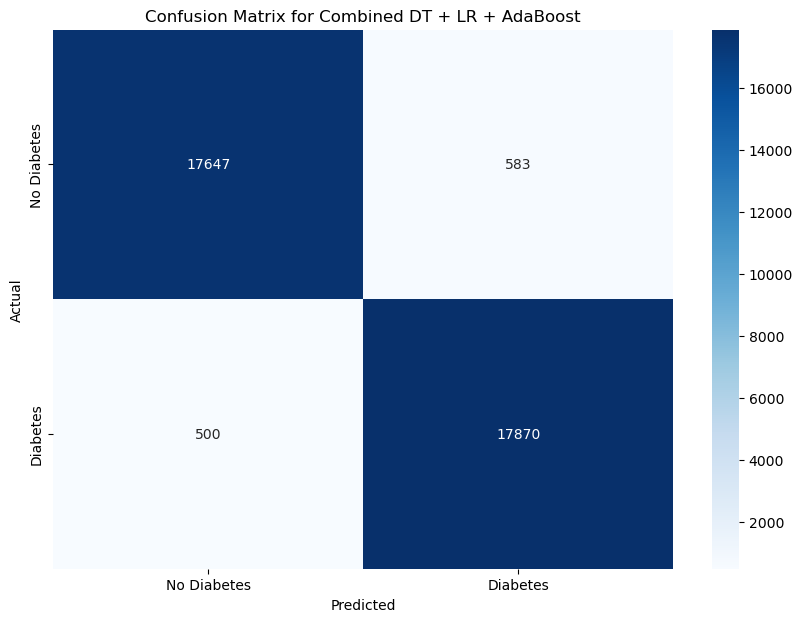

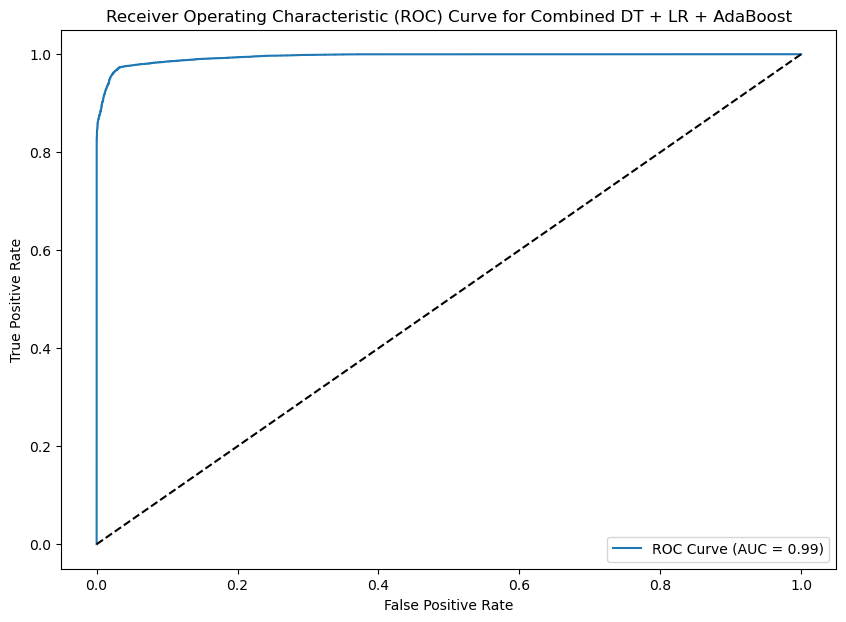

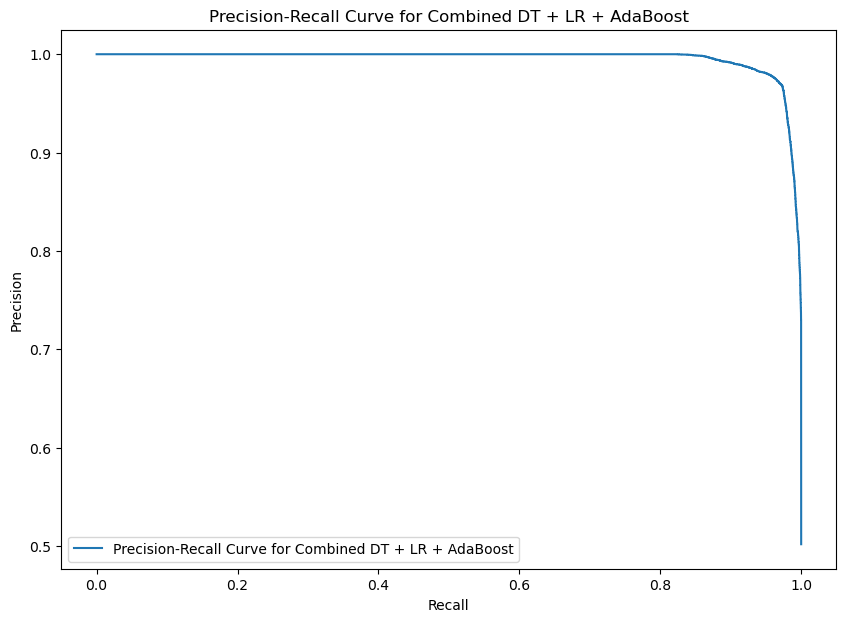

All Classifiers Combined Accuracy: 0.9788251366120219
All Classifiers Combined Precision: 0.981606175069798
All Classifiers Combined Recall: 0.9761023407729995
All Classifiers Combined F1 Score: 0.9788465212763053
All Classifiers Combined AUC: 0.9980705038832722
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18230
           1       0.98      0.98      0.98     18370

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Sample results for All Classifiers Combined:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


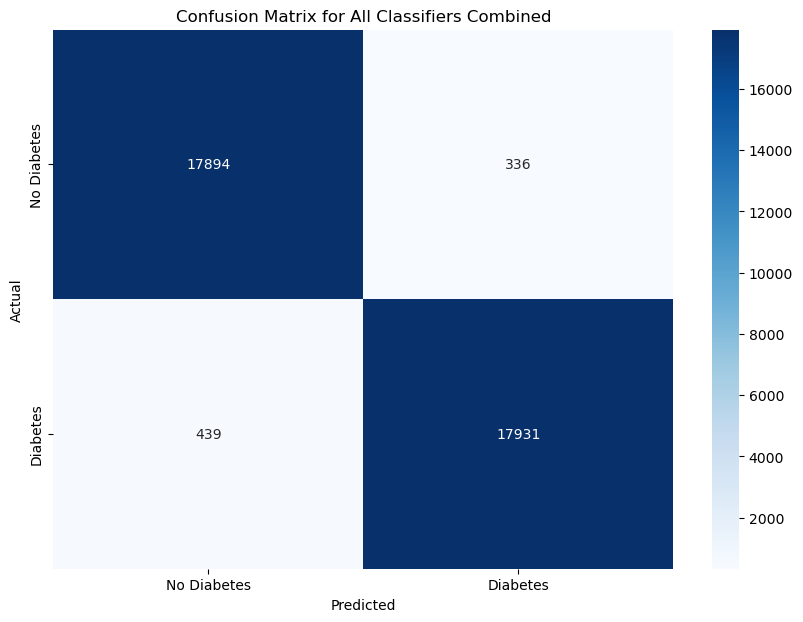

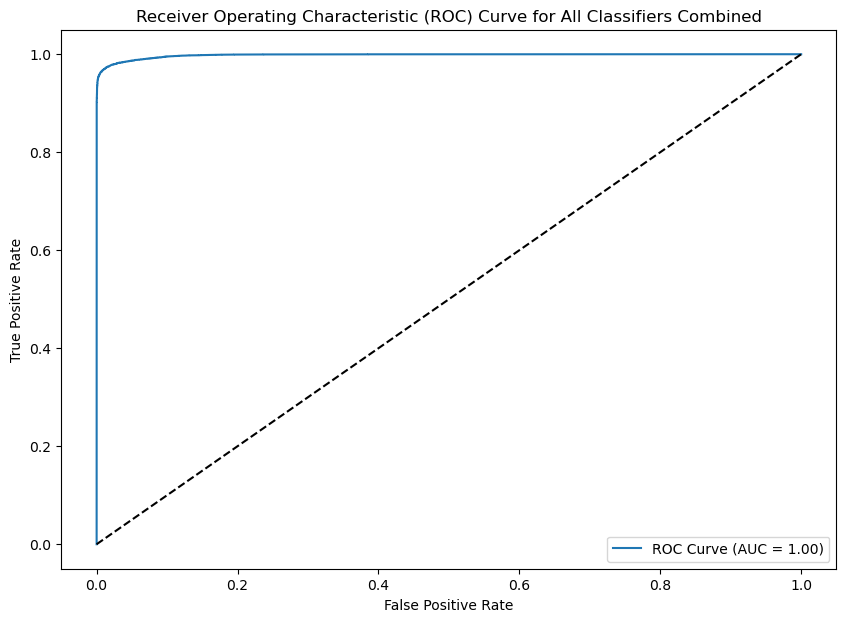

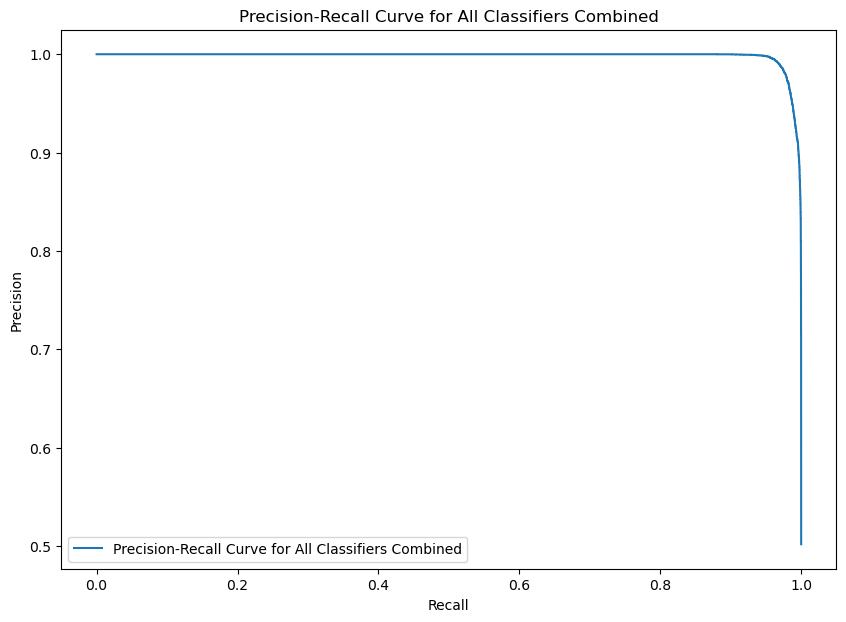

Bagging Classifier Accuracy: 0.9658743169398907
Bagging Classifier Precision: 0.9993000874890638
Bagging Classifier Recall: 0.9326619488296135
Bagging Classifier F1 Score: 0.9648317612276502
Bagging Classifier AUC: 0.9950700792600208
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18230
           1       1.00      0.93      0.96     18370

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Sample results for Bagging Classifier:
    Actual  Predicted
0       1          1
1       0          0
2       0          0
3       0          0
4       0          0
5       1          1
6       0          0
7       0          0
8       0          0
9       1          1


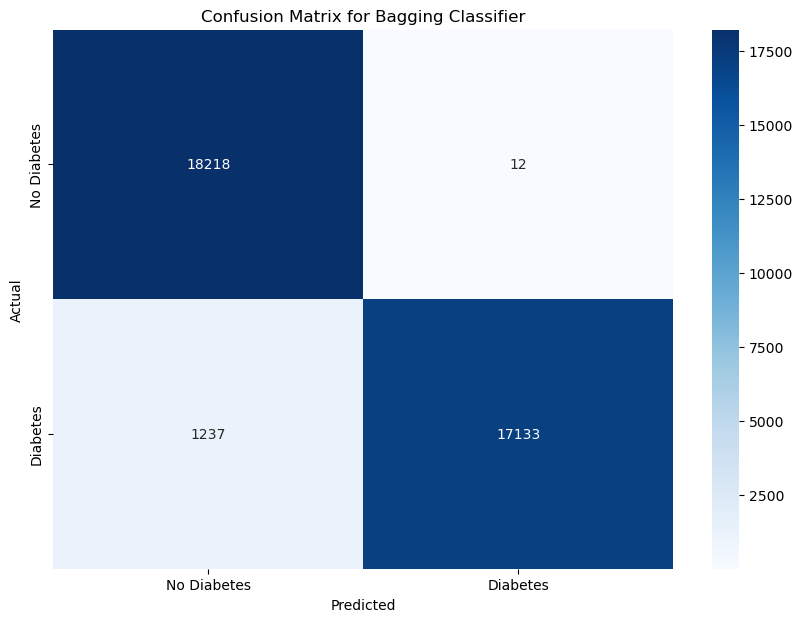

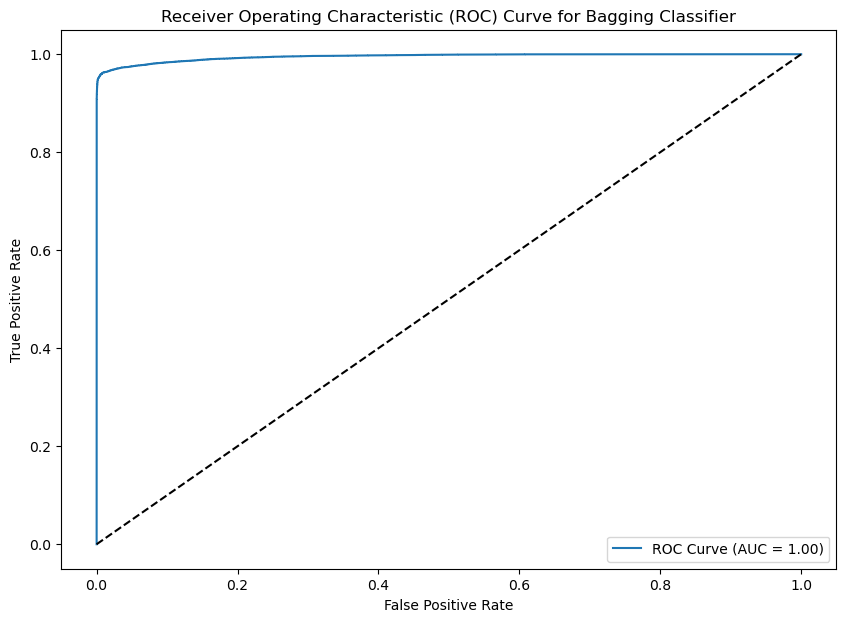

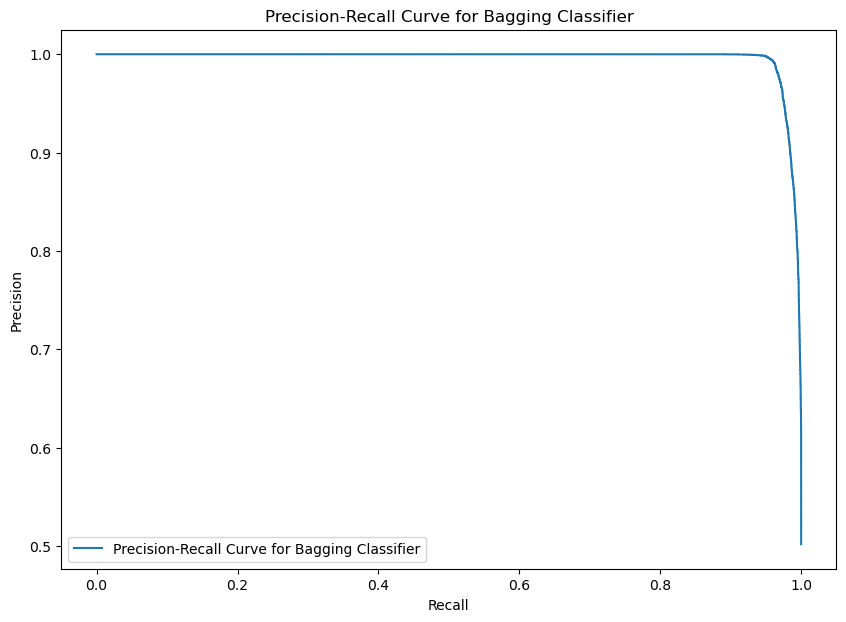

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,
                             classification_report, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load the oversampled data
file_path = '/home/user/Desktop/Gaurav/smote_oversampled_data.xlsx'
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=5000)
ada_clf = AdaBoostClassifier(n_estimators=50)  # Using default base estimator
xg_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
bagging_clf = BaggingClassifier(
    n_estimators=1500,  # Number of base estimators
    max_samples=0.8,    # Fraction of samples to be used for fitting each base estimator
    max_features=1,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)
# Fit individual classifiers
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)
xg_clf.fit(X_train, y_train)
bagging_clf.fit(X_train, y_train)
# Evaluation function
def evaluate_model(model, model_name):
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')
    
    # Calculate additional metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC
    auc = roc_auc_score(y_test, y_pred_prob)

    # Display the metrics
    print(f'{model_name} Precision: {precision}')
    print(f'{model_name} Recall: {recall}')
    print(f'{model_name} F1 Score: {f1}')
    print(f'{model_name} AUC: {auc}')
    print(classification_report(y_test, y_pred))

    # Sample Predictions
    sample_indices = range(10)
    sample_results = pd.DataFrame({
        'Actual': y_test.iloc[sample_indices].values,
        'Predicted': y_pred[sample_indices]
    })
    print(f'Sample results for {model_name}:\n', sample_results)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Predict probabilities for ROC curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Plot precision-recall curve
    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, label=f'Precision-Recall Curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.show()

# Evaluate individual classifiers
evaluate_model(dt, 'Decision Tree')
evaluate_model(knn, 'KNN')
evaluate_model(rf, 'Random Forest')
evaluate_model(lr, 'Logistic Regression')
evaluate_model(ada_clf, 'AdaBoost')
evaluate_model(xg_clf, 'XGBoost')

# Define Voting Classifier combinations
combined_dt_rf_knn = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('knn', knn)], voting='soft')
combined_dt_rf_lr = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('lr', lr)], voting='soft')
combined_knn_rf_lr = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('lr', lr)], voting='soft')
combined_dt_knn_lr = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr', lr)], voting='soft')
combined_rf_ada_xg = VotingClassifier(estimators=[('rf', rf), ('ada', ada_clf), ('xg', xg_clf)], voting='soft')
combined_dt_lr_ada = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('ada', ada_clf)], voting='soft')
combined_all_multiple = VotingClassifier(estimators=[
    ('dt', dt), ('knn', knn), ('rf', rf), ('lr', lr), ('ada', ada_clf), ('xg', xg_clf)], voting='soft')

# Fit Voting Classifiers
combined_dt_rf_knn.fit(X_train, y_train)
combined_dt_rf_lr.fit(X_train, y_train)
combined_knn_rf_lr.fit(X_train, y_train)
combined_dt_knn_lr.fit(X_train, y_train)
combined_rf_ada_xg.fit(X_train, y_train)
combined_dt_lr_ada.fit(X_train, y_train)
combined_all_multiple.fit(X_train, y_train)

# Evaluate Voting Classifier combinations
evaluate_model(combined_dt_rf_knn, 'Combined DT + RF + KNN')
evaluate_model(combined_dt_rf_lr, 'Combined DT + RF + LR')
evaluate_model(combined_knn_rf_lr, 'Combined KNN + RF + LR')
evaluate_model(combined_dt_knn_lr, 'Combined DT + KNN + LR')
evaluate_model(combined_rf_ada_xg, 'Combined RF + AdaBoost + XGBoost')
evaluate_model(combined_dt_lr_ada, 'Combined DT + LR + AdaBoost')
evaluate_model(combined_all_multiple, 'All Classifiers Combined')

# Bagging Classifier
bagging_clf = BaggingClassifier(
    n_estimators=1500,  # Number of base estimators
    max_samples=0.8,    # Fraction of samples to be used for fitting each base estimator
    max_features=1,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Train Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Evaluate Bagging Classifier
evaluate_model(bagging_clf, 'Bagging Classifier')
